# Final sample created for the COSMOS field

This sample results from merging information from 3D-HST for the spectral lines H$_\alpha$, H$_\beta$, OII and OIII, and redshifts, broad band photometry u,B,V,r,i,z,J,H,Ks from Laigle et al., 2016 and IR data Spitzer 24$_{\mu m}$, PACS 100$_{\mu m}$ and 160$_{\mu m}$, and SPIRE 250$_{\mu m}$, 300$_{\mu m}$, and 500$_{\mu m}$. 

In [1]:
# Regular packages

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.colors as colors
from astropy.table import Table, Column
import pandas as pd
import os

from astropy import units as u
from astropy.coordinates import SkyCoord, ICRS
from astropy import visualization as vz
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

In [2]:
# The 'final_sample.fits' file in /home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/CIGALE_file/
# has all the information without being filtered yet! 
# However, COSMOS_final.fits is the same but ready for CIGALE-analysis 

# No-Resdshift restricted
final_mine = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS'
                        '/CIGALE_file/COSMOS_final.fits', format='fits')

# Saving a new file without lines and in CIGALON format to be run on Vulcain

In [51]:
# Final sample to be used for scientific analysis in CIGALON format

final_cig_version = Table([final_mine_z['id'], final_mine_z['redshift'],\
                      final_mine_z['galex.NUV'], final_mine_z['galex.NUV_err'],\
                      final_mine_z['cfht.megacam.u'], final_mine_z['cfht.megacam.u_err'],\
                      final_mine_z['subaru.suprime.B'], final_mine_z['subaru.suprime.B_err'],\
                      final_mine_z['subaru.suprime.V'], final_mine_z['subaru.suprime.V_err'],\
                      final_mine_z['subaru.suprime.r'], final_mine_z['subaru.suprime.r_err'],\
                      final_mine_z['subaru.suprime.i'], final_mine_z['subaru.suprime.i_err'],\
                      final_mine_z['subaru.suprime.z'], final_mine_z['subaru.suprime.z_err'],\
                      final_mine_z['subaru.hsc.y'], final_mine_z['subaru.hsc.y_err'],\
                      final_mine_z['UKIRT_WFCJ'], final_mine_z['UKIRT_WFCJ_err'],\
                      final_mine_z['cfht.wircam.H'], final_mine_z['cfht.wircam.H_err'],\
                      final_mine_z['WFCAM_K'], final_mine_z['WFCAM_K_err'],\
                      final_mine_z['IRAC1'], final_mine_z['IRAC1_err'],\
                      final_mine_z['IRAC2'], final_mine_z['IRAC2_err'],\
                      final_mine_z['IRAC3'], final_mine_z['IRAC3_err'],\
                      final_mine_z['IRAC4'], final_mine_z['IRAC4_err'],\
                      final_mine_z['spitzer.mips.24'], final_mine_z['spitzer.mips.24_err'],\
                      final_mine_z['herschel.pacs.100'], final_mine_z['herschel.pacs.100_err'],\
                      final_mine_z['herschel.pacs.160'], final_mine_z['herschel.pacs.160_err'],\
                      final_mine_z['herschel.spire.PSW'], final_mine_z['herschel.spire.PSW_err'],\
                      final_mine_z['herschel.spire.PMW'], final_mine_z['herschel.spire.PMW_err'],\
                      final_mine_z['herschel.spire.PLW'], final_mine_z['herschel.spire.PLW_err']],\
               names = ('id', 'redshift', 'galex_nuv', 'galex_nuv_err', 'megacam_u', 'megacam_u_err',\
                        'suprime_b', 'suprime_b_err', 'suprime_v', 'suprime_v_err',\
                        'suprime_r', 'suprime_r_err', 'suprime_i', 'suprime_i_err',\
                        'suprime_z', 'suprime_z_err', 'suprime_y', 'suprime_y_err',\
                        'vista_j', 'vista_j_err', 'vista_h', 'vista_h_err',\
                        'vista_ks', 'vista_ks_err', 'IRAC_CH1', 'IRAC_CH1_err',\
                        'IRAC_CH2', 'IRAC_CH2_err', 'IRAC_CH3', 'IRAC_CH3_err',\
                        'IRAC_CH4', 'IRAC_CH4_err', 'mips_24', 'mips_24_err',\
                        'pacs_green', 'pacs_green_err',\
                        'pacs_red', 'pacs_red_err',\
                        'spire_250', 'spire_250_err', 'spire_350',\
                        'spire_350_err', 'spire_500', 'spire_500_err'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/CIGALE_file/COSMOS_final_z_cigalon.fits')
final_cig_version.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                        'CIGALE_file/COSMOS_final_z_cigalon.fits', format='fits')

# Functions

In [3]:
def redshift_range(L_obs, L_emit):
    return (abs(L_obs - L_emit)/L_emit)

# New analysis of our sample

In [4]:
# Band in the final sample file
# Names are created in an array for plots labels 

bands     = ['galex.NUV',\
             'cfht.megacam.u', 'subaru.suprime.B', 'subaru.suprime.V',\
             'subaru.suprime.r', 'subaru.suprime.i', 'subaru.suprime.z',\
             'subaru.hsc.y', 'UKIRT_WFCJ', 'cfht.wircam.H', 'WFCAM_K',\
             'IRAC1','IRAC2', 'IRAC3', 'IRAC4',\
             'spitzer.mips.24', 'herschel.pacs.100', 'herschel.pacs.160',\
             'herschel.spire.PSW', 'herschel.spire.PMW', 'herschel.spire.PLW']

band_name = ['NUV',\
            'u', 'B', 'V',\
            'r', 'i', 'z',\
            'y', 'J', 'H', 'Ks',\
            'IRAC 1', 'IRAC 2', 'IRAC 3', 'IRAC 4',\
            'MIPS 24', 'PACS 100', 'PACS 160',\
            'SPIRE 250', 'SPIRE 350', 'SPIRE 500']

columns_final = ['galex.NUV',\
                 'cfht.megacam.u',\
                 'subaru.suprime.B',\
                 'subaru.suprime.V',\
                 'subaru.suprime.r',\
                 'subaru.suprime.i',\
                 'subaru.suprime.z',\
                 'subaru.hsc.y',\
                 'UKIRT_WFCJ',\
                 'cfht.wircam.H',\
                 'WFCAM_K',\
                 'IRAC1','IRAC2',\
                 'IRAC3','IRAC4',\
                 'spitzer.mips.24',\
                 'herschel.pacs.100',\
                 'herschel.pacs.160',\
                 'herschel.spire.PSW',\
                 'herschel.spire.PMW',\
                 'herschel.spire.PLW',\
                 'line.NII-654.8+line.H-alpha+line.NII-658.4',\
                 'line.H-beta',\
                 'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12',\
                 'line.OIII-500.7']

column_names = ['NUV', 'u', 'B', 'V', 'r',\
                'i', 'z', 'y', 'J', 'H',\
                'Ks', 'Irac 1', 'Irac 2', 'Irac 3', 'Irac4',\
                'Spitzer 24', 'PACS 100', 'PACS 160', 'SPIRE 250', 'SPIRE 350',\
                'SPIRE 500', 'Ha', 'Hb', 'OII', 'OIII']

bands_jin = ['galex.NUV',\
             'cfht.megacam.u', 'subaru.suprime.B', 'subaru.suprime.V',\
             'subaru.suprime.r', 'subaru.suprime.i', 'subaru.suprime.z',\
             'subaru.hsc.y', 'UKIRT_WFCJ', 'cfht.wircam.H', 'WFCAM_K',\
             'IRAC1','IRAC2', 'IRAC3', 'IRAC4',\
             'spitzer.mips.24', 'F100', 'F160',\
             'F250', 'F350', 'F500']

cigale_bands = ['best.galex.NUV',\
                'best.cfht.megacam.u','best.subaru.suprime.B','best.subaru.suprime.V',\
                'best.subaru.suprime.r','best.subaru.suprime.i','best.subaru.suprime.z',\
                'best.subaru.hsc.y','best.UKIRT_WFCJ','best.cfht.wircam.H','best.WFCAM_K',\
                'best.IRAC1','best.IRAC2','best.IRAC3','best.IRAC4',\
                'best.spitzer.mips.24','best.herschel.pacs.100','best.herschel.pacs.160',\
                'best.herschel.spire.PSW','best.herschel.spire.PMW','best.herschel.spire.PLW']

model_lines = ['best.line.NII-654.8+line.H-alpha+line.NII-658.4',\
               'best.line.H-beta',\
#                'best.line.OII-372.7',\
               'best.line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12',\
               'best.line.OIII-500.7']

lines       = ['line.NII-654.8+line.H-alpha+line.NII-658.4',\
               'line.H-beta',\
               'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12',\
               'line.OIII-500.7']

# Number of objects per bands, combiantion of bands, emission lines ....

This is performed in order to get to know really well the sample we have. We need to have in mind which kind of data we are dealing with so in the end using the SED fitting we can reduce our sample to the best candidates with the best and realiable data measurements.

In [5]:
# Checking the number of objects per band, per emission lines and a combiantion of both

print('--------------------------------------------------------------------------------------------------------')
print('  Bands\t\t\tNumber of Objects\tPercentage (%)\t\tSNR > 3\t\tPercentage (%)')
print('--------------------------------------------------------------------------------------------------------')

for i in range (len(columns_final)):\
    
    data = final_mine[columns_final[i]][final_mine[columns_final[i]] > 0]
    snr  = final_mine[final_mine[columns_final[i]]/final_mine[columns_final[i]+'_err'] > 3]
    
    print('%10s\t\t\t%i\t\t%.2f\t\t\t%i\t\t%.2f'%(column_names[i], len(data), len(data)/len(final_mine)*100,\
                                            len(snr), len(snr)/len(final_mine)*100))
    
print('--------------------------------------------------------------------------------------------------------')


PACS_data = final_mine[((final_mine['herschel.pacs.100'] > 0) & (final_mine['herschel.pacs.160'] > 0))]

SPIRE_data = final_mine[((final_mine['herschel.spire.PSW'] > 0) & (final_mine['herschel.spire.PMW'] > 0)) ^\
                        ((final_mine['herschel.spire.PSW'] > 0) & (final_mine['herschel.spire.PLW'] > 0)) ^\
                        ((final_mine['herschel.spire.PMW'] > 0) & (final_mine['herschel.spire.PLW'] > 0))]

IR_data = SPIRE_data[((SPIRE_data['herschel.pacs.100'] > 0) & (SPIRE_data['herschel.pacs.160'] > 0))]
print('\n-----------------------------------------------------------------------------------')
print('Infrared data')
print('-----------------------------------------------------------------------------------')
print('At least two PACS: \t\t%i'%len(PACS_data))
print('At least two SPIRE: \t\t%i'%len(SPIRE_data))
print('At least two PACS or Two SPIRE: %i'%len(IR_data))
print('-----------------------------------------------------------------------------------')

Hab     = final_mine[(final_mine[columns_final[21]] > 0) & (final_mine[columns_final[22]] > 0)]
HabOII  = Hab[(Hab[columns_final[23]] > 0)]
HabOIII = Hab[(Hab[columns_final[24]] > 0)]
HaOIII  = final_mine[(final_mine[columns_final[21]] > 0) & (final_mine[columns_final[24]] > 0)]
HbOIII  = final_mine[(final_mine[columns_final[22]] > 0) & (final_mine[columns_final[24]] > 0)]
print('\n-----------------------------------------------------------------------------------')
print('Emission lines')
print('-----------------------------------------------------------------------------------')
print('Ha and Hb: %i'%len(Hab))
print('Ha and Hb and OII: %i'%len(HabOII))
print('Ha and Hb and OIII: %i'%len(HabOIII))
print('Ha and OIII: %i'%len(HaOIII))
print('Hb and OIII: %i'%len(HbOIII))

IR_data_Ha      = IR_data[IR_data[columns_final[21]] > 0]
IR_data_Hb      = IR_data[IR_data[columns_final[22]] > 0]
IR_data_OII     = IR_data[IR_data[columns_final[23]] > 0]
IR_data_OIII    = IR_data[IR_data[columns_final[24]] > 0]
IR_data_HabOIII = IR_data_OIII[(IR_data_OIII[columns_final[21]] > 0) ^ (IR_data_OIII[columns_final[22]] > 0)]
print('\n-----------------------------------------------------------------------------------')
print('IR and at least one emission line')
print('-----------------------------------------------------------------------------------')
print('Two PACS or two SPIRE + Ha: %i'%len(IR_data_Ha))
print('Two PACS or two SPIRE + Hb: %i'%len(IR_data_Hb))
print('Two PACS or two SPIRE + OII: %i'%len(IR_data_OII))
print('Two PACS or two SPIRE + OIII: %i'%len(IR_data_OIII))
print('Two PACS or two SPIRE + Ha,Hb,OIII: %i'%len(IR_data_HabOIII))

--------------------------------------------------------------------------------------------------------
  Bands			Number of Objects	Percentage (%)		SNR > 3		Percentage (%)
--------------------------------------------------------------------------------------------------------
       NUV			1699		46.22			716		19.48
         u			3673		99.92			2905		79.03
         B			3673		99.92			3351		91.16
         V			3671		99.86			3345		91.00
         r			3671		99.86			3473		94.48
         i			3672		99.89			3530		96.03
         z			3676		100.00			3368		91.62
         y			3629		98.72			2442		66.43
         J			3669		99.81			3391		92.25
         H			3662		99.62			3336		90.75
        Ks			3673		99.92			3486		94.83
    Irac 1			3666		99.73			3658		99.51
    Irac 2			3666		99.73			3655		99.43
    Irac 3			2362		64.25			596		16.21
     Irac4			884		24.05			176		4.79
Spitzer 24			3676		100.00			1276		34.71
  PACS 100			3676		100.00			390		10.61
  PACS 160			3676		100.00			210		5.71
 SPIRE 250			372		10.12	

/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


# Redhsift versus flux per band

This is useful in order to visually check if the sample has more or less data per band as shown before in the tables. Also because maybe spurious objects can be easily pointed out and the general quality of the sample can be studied. 

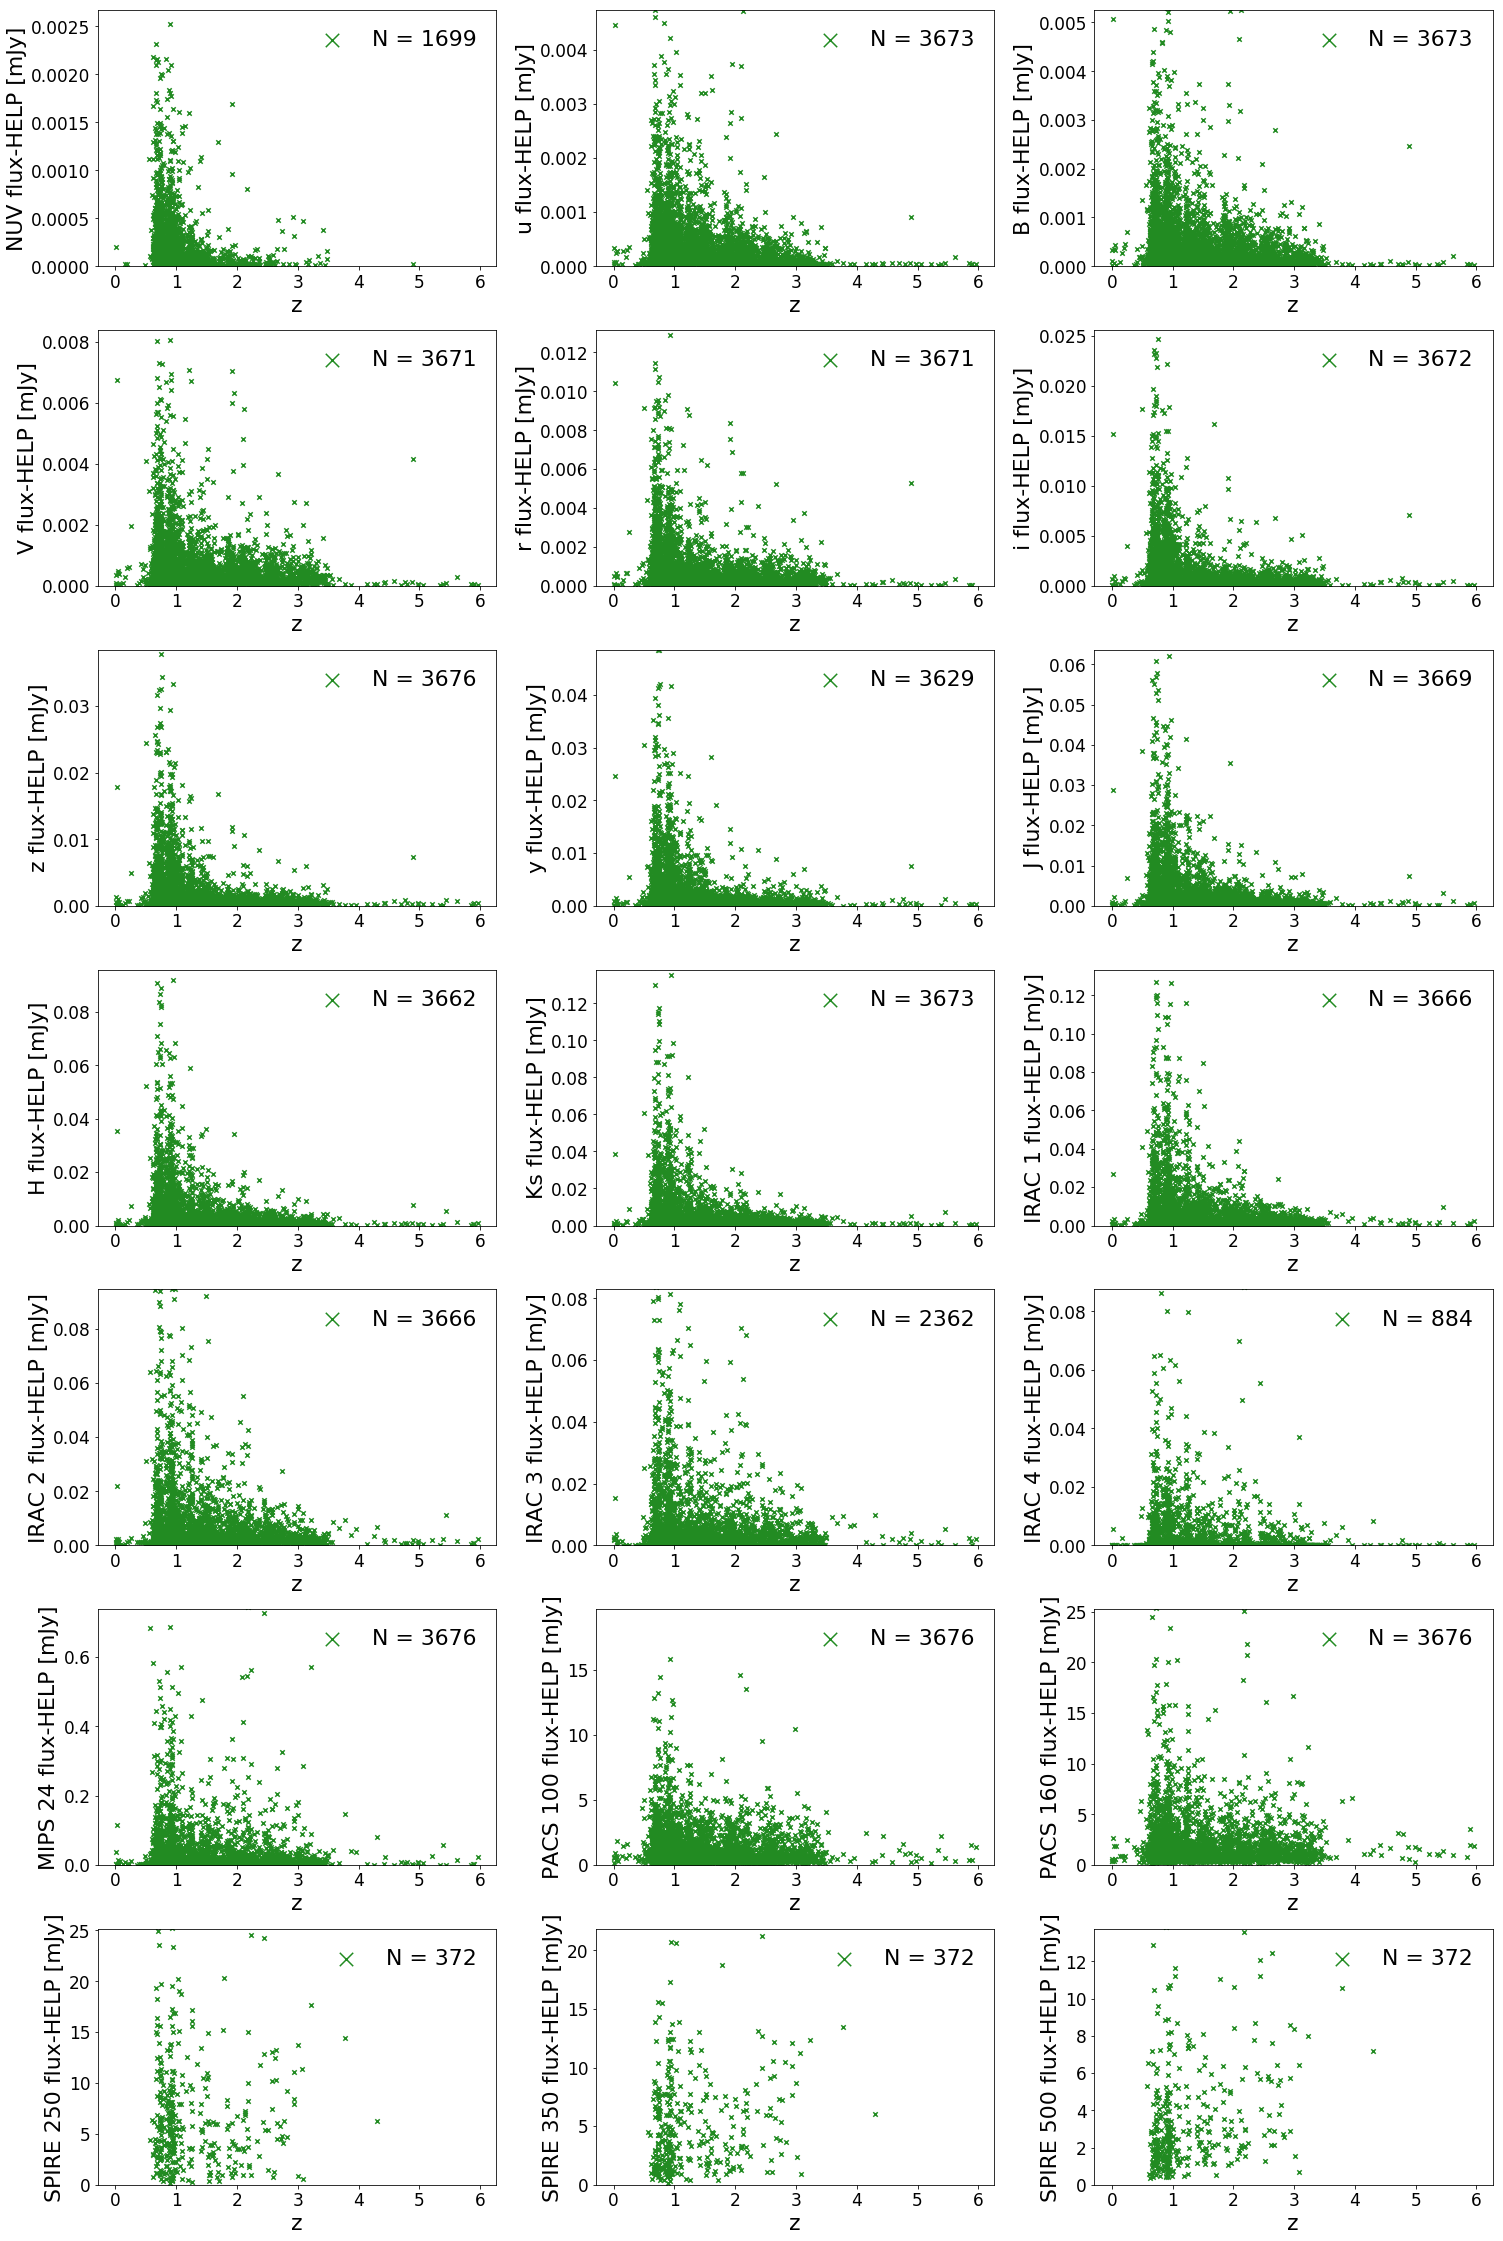

In [43]:
fig, axs = plt.subplots(7,3, figsize=(25, 40), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.25, wspace = 0.25)

axs = axs.ravel()

for i in range(len(bands)):
    
    data = final_mine[columns_final[i]][final_mine[columns_final[i]] > 0]

    axs[i].scatter(final_mine['redshift'], final_mine[bands[i]], s = 20, label = 'N = %i'%len(data),\
                   c = 'forestgreen', marker = 'x')
#     axs[i].set_yscale('symlog')
#     axs[i].set_xscale('symlog')
    axs[i].set_ylim(0, np.nanpercentile(final_mine[bands[i]], 99.8))
    axs[i].set_xlabel('z', fontsize = 22)
    axs[i].set_ylabel('%s flux-HELP [mJy]'%band_name[i], fontsize = 22)
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 17)
    axs[i].legend(frameon = False, prop = {'size': 22}, markerscale = 3, loc = 'upper right')

In [7]:
# Limits for the emission lines detected in WFC3 G141 (11000-16500 A)

emission_lines = np.array([6563, 4861, 3729.875, 5007]) #In Angstrom for Ha, Hb, OII, OIII
z_low          = redshift_range(11000, emission_lines)
z_high         = redshift_range(16500, emission_lines) 

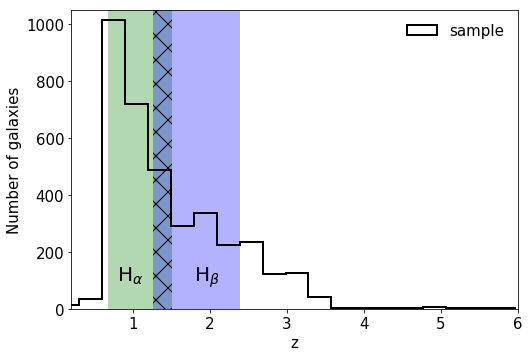

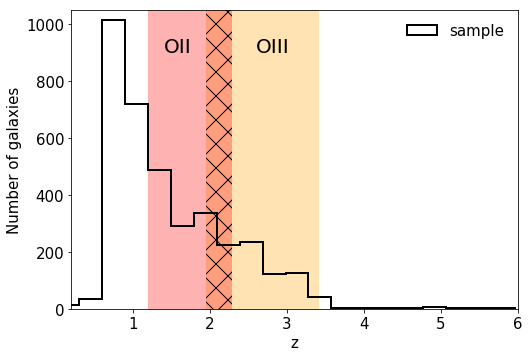

In [8]:
# test = test[test['redshift_y'] != -9999.99]

plt.figure(figsize = (8,5.5))
plt.hist(final_mine['redshift'], bins = 20, histtype = 'step', lw = 2, label = 'sample', color = 'k')
plt.fill_between([z_low[0], z_high[0]], 0.0, 1050, facecolor='green', alpha=0.3)
plt.fill_between([z_low[1], z_high[1]], 0.0, 1050, facecolor='blue', alpha=0.3)
plt.fill_between([min(z_high[0], z_low[1]), min(z_high[1], z_high[0])],\
                 0.0, 1050, facecolor='k', alpha=0.0, hatch="X")
plt.text(0.8, 100, r'H$_\alpha$', fontsize=20)
plt.text(1.8, 100, r'H$_\beta$', fontsize=20)
plt.xlim(0.2, 6)
plt.ylim(0, 1050)
plt.xlabel('z', fontsize = 15)
plt.ylabel('Number of galaxies', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.5 , loc = 'upper right');

plt.figure(figsize = (8,5.5))
plt.hist(final_mine['redshift'], bins = 20, histtype = 'step', lw = 2, label = 'sample', color = 'k')
plt.fill_between([z_low[2], z_high[2]], 0.0, 1050, facecolor='orange', alpha=0.3)
plt.fill_between([z_low[3], z_high[3]], 0.0, 1050, facecolor='red', alpha=0.3)
plt.fill_between([min(z_high[3], z_low[2]), min(z_high[2], z_high[3])],\
                 0.0, 1050, facecolor='k', alpha=0.0, hatch="X")
plt.text(1.4, 900, 'OII', fontsize=20)
plt.text(2.6, 900, 'OIII', fontsize=20)
plt.xlim(0.2, 6)
plt.ylim(0, 1050)
plt.xlabel('z', fontsize = 15)
plt.ylabel('Number of galaxies', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.5 , loc = 'upper right');

# Crossmatching this sample to Jin to characterize photometric quality

In [102]:
# File Final_Sample_RADec_PACSredCorrected_Added.fits is equivalent to 
# COSMOS_final.fits but with RA and DEC information added and also IR data in different units

# This file is crossmatched to Jin data COMSOS_Super_Deblended_FIRmm_Catalog_20180719.fits

final_sample_HELP_Jin = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS'
                        '/CIGALE_file/COSMOS_final_JinAdded.fits', format='fits')

In [10]:
# Changing inf values to NAN and NAN to -9999.99 for boolean operation and CIGALE

final_sample_HELP_Jin = final_sample_HELP_Jin.to_pandas()
final_sample_HELP_Jin = final_sample_HELP_Jin.replace([np.inf, -np.inf], np.nan)
final_sample_HELP_Jin = final_sample_HELP_Jin.fillna(-9999.99)
final_sample_HELP_Jin = Table.from_pandas(final_sample_HELP_Jin)

# Convert from μJy to mJy
for col in ['help_f_pacs_green','help_ferr_pacs_green',\
            'help_f_pacs_red','help_ferr_pacs_red',\
            'help_f_spire_250','help_ferr_spire_250',\
            'help_f_spire_350','help_ferr_spire_350',\
            'help_f_spire_500','help_ferr_spire_500']:
    final_sample_HELP_Jin[col] *= 1e-3

In [13]:
# Saving file for CIGALON-and-Released with help data

final_help_cig_version = Table([final_sample_HELP_Jin['id_1'], final_sample_HELP_Jin['redshift'],\
                      final_sample_HELP_Jin['galex.NUV'], final_sample_HELP_Jin['galex.NUV_err'],\
                      final_sample_HELP_Jin['cfht.megacam.u'], final_sample_HELP_Jin['cfht.megacam.u_err'],\
                      final_sample_HELP_Jin['subaru.suprime.B'], final_sample_HELP_Jin['subaru.suprime.B_err'],\
                      final_sample_HELP_Jin['subaru.suprime.V'], final_sample_HELP_Jin['subaru.suprime.V_err'],\
                      final_sample_HELP_Jin['subaru.suprime.r'], final_sample_HELP_Jin['subaru.suprime.r_err'],\
                      final_sample_HELP_Jin['subaru.suprime.i'], final_sample_HELP_Jin['subaru.suprime.i_err'],\
                      final_sample_HELP_Jin['subaru.suprime.z'], final_sample_HELP_Jin['subaru.suprime.z_err'],\
                      final_sample_HELP_Jin['subaru.hsc.y'], final_sample_HELP_Jin['subaru.hsc.y_err'],\
                      final_sample_HELP_Jin['UKIRT_WFCJ'], final_sample_HELP_Jin['UKIRT_WFCJ_err'],\
                      final_sample_HELP_Jin['cfht.wircam.H'], final_sample_HELP_Jin['cfht.wircam.H_err'],\
                      final_sample_HELP_Jin['WFCAM_K'], final_sample_HELP_Jin['WFCAM_K_err'],\
                      final_sample_HELP_Jin['IRAC1'], final_sample_HELP_Jin['IRAC1_err'],\
                      final_sample_HELP_Jin['IRAC2'], final_sample_HELP_Jin['IRAC2_err'],\
                      final_sample_HELP_Jin['IRAC3'], final_sample_HELP_Jin['IRAC3_err'],\
                      final_sample_HELP_Jin['IRAC4'], final_sample_HELP_Jin['IRAC4_err'],\
                      final_sample_HELP_Jin['spitzer.mips.24'], final_sample_HELP_Jin['spitzer.mips.24_err'],\
                      final_sample_HELP_Jin['herschel.pacs.100'], final_sample_HELP_Jin['herschel.pacs.100_err'],\
                      final_sample_HELP_Jin['help_f_pacs_red'], final_sample_HELP_Jin['help_ferr_pacs_red'],\
                      final_sample_HELP_Jin['herschel.spire.PSW'], final_sample_HELP_Jin['herschel.spire.PSW_err'],\
                      final_sample_HELP_Jin['herschel.spire.PMW'], final_sample_HELP_Jin['herschel.spire.PMW_err'],\
                      final_sample_HELP_Jin['herschel.spire.PLW'], final_sample_HELP_Jin['herschel.spire.PLW_err'],\
                      final_sample_HELP_Jin['line.NII-654.8+line.H-alpha+line.NII-658.4'],\
                      final_sample_HELP_Jin['line.NII-654.8+line.H-alpha+line.NII-658.4_err'],\
                      final_sample_HELP_Jin['line.H-beta'], final_sample_HELP_Jin['line.H-beta_err'],\
                      final_sample_HELP_Jin['line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12'],\
                      final_sample_HELP_Jin['line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12_err'],\
                      final_sample_HELP_Jin['line.OIII-500.7'], final_sample_HELP_Jin['line.OIII-500.7_err']],\
               names = ('id','redshift', 'galex.NUV', 'galex.NUV_err', 'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err', 'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err', 'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err', 'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err', 'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err', 'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err', 'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err', 'spitzer.mips.24', 'spitzer.mips.24_err',\
                        'herschel.pacs.100', 'herschel.pacs.100_err',\
                        'herschel.pacs.160', 'herschel.pacs.160_err',\
                        'herschel.spire.PSW', 'herschel.spire.PSW_err',\
                        'herschel.spire.PMW', 'herschel.spire.PMW_err',\
                        'herschel.spire.PLW', 'herschel.spire.PLW_err',\
                        'line.NII-654.8+line.H-alpha+line.NII-658.4', 'line.NII-654.8+line.H-alpha+line.NII-658.4_err',\
                        'line.H-beta', 'line.H-beta_err',\
                        'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12',\
                        'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12_err',\
#                         'line.OII-372.7',\
#                         'line.OII-372.7_err',\
                        'line.OIII-500.7', 'line.OIII-500.7_err'))                               
#                names = ('id', 'redshift', 'galex_nuv', 'galex_nuv_err', 'megacam_u', 'megacam_u_err',\
#                         'suprime_b', 'suprime_b_err', 'suprime_v', 'suprime_v_err',\
#                         'suprime_r', 'suprime_r_err', 'suprime_i', 'suprime_i_err',\
#                         'suprime_z', 'suprime_z_err', 'suprime_y', 'suprime_y_err',\
#                         'vista_j', 'vista_j_err', 'vista_h', 'vista_h_err',\
#                         'vista_ks', 'vista_ks_err', 'IRAC_CH1', 'IRAC_CH1_err',\
#                         'IRAC_CH2', 'IRAC_CH2_err', 'IRAC_CH3', 'IRAC_CH3_err',\
#                         'IRAC_CH4', 'IRAC_CH4_err', 'mips_24', 'mips_24_err',\
#                         'pacs_green', 'pacs_green_err',\
#                         'pacs_red', 'pacs_red_err',\
#                         'spire_250', 'spire_250_err', 'spire_350',\
#                         'spire_350_err', 'spire_500', 'spire_500_err'))

# os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/CIGALE_file/'
#           'COSMOS_final_JinAdded_cigalon_HELP.fits')
# final_help_cig_version.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
#                         'CIGALE_file/COSMOS_final_JinAdded_cigalon_HELP.fits', format='fits')

# os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/CIGALE_file/'
#           'COSMOS_final_JinAdded_released_HELP.fits')
# final_help_cig_version.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
#                         'CIGALE_file/COSMOS_final_JinAdded_released_HELP.fits', format='fits')

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/CIGALE_file/'
          'COSMOS_final_JinAdded_released_HELP.fits')
final_help_cig_version.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                        'CIGALE_file/COSMOS_final_JinAdded_released_HELP.fits', format='fits')

In [14]:
# Saving file for CIGALON-and-Released with jin data

final_jin_cig_version = Table([final_sample_HELP_Jin['id_1'], final_sample_HELP_Jin['redshift'],\
                      final_sample_HELP_Jin['galex.NUV'], final_sample_HELP_Jin['galex.NUV_err'],\
                      final_sample_HELP_Jin['cfht.megacam.u'], final_sample_HELP_Jin['cfht.megacam.u_err'],\
                      final_sample_HELP_Jin['subaru.suprime.B'], final_sample_HELP_Jin['subaru.suprime.B_err'],\
                      final_sample_HELP_Jin['subaru.suprime.V'], final_sample_HELP_Jin['subaru.suprime.V_err'],\
                      final_sample_HELP_Jin['subaru.suprime.r'], final_sample_HELP_Jin['subaru.suprime.r_err'],\
                      final_sample_HELP_Jin['subaru.suprime.i'], final_sample_HELP_Jin['subaru.suprime.i_err'],\
                      final_sample_HELP_Jin['subaru.suprime.z'], final_sample_HELP_Jin['subaru.suprime.z_err'],\
                      final_sample_HELP_Jin['subaru.hsc.y'], final_sample_HELP_Jin['subaru.hsc.y_err'],\
                      final_sample_HELP_Jin['UKIRT_WFCJ'], final_sample_HELP_Jin['UKIRT_WFCJ_err'],\
                      final_sample_HELP_Jin['cfht.wircam.H'], final_sample_HELP_Jin['cfht.wircam.H_err'],\
                      final_sample_HELP_Jin['WFCAM_K'], final_sample_HELP_Jin['WFCAM_K_err'],\
                      final_sample_HELP_Jin['IRAC1'], final_sample_HELP_Jin['IRAC1_err'],\
                      final_sample_HELP_Jin['IRAC2'], final_sample_HELP_Jin['IRAC2_err'],\
                      final_sample_HELP_Jin['IRAC3'], final_sample_HELP_Jin['IRAC3_err'],\
                      final_sample_HELP_Jin['IRAC4'], final_sample_HELP_Jin['IRAC4_err'],\
                      final_sample_HELP_Jin['spitzer.mips.24'], final_sample_HELP_Jin['spitzer.mips.24_err'],\
                      final_sample_HELP_Jin['F100'], final_sample_HELP_Jin['DF100'],\
                      final_sample_HELP_Jin['F160'], final_sample_HELP_Jin['DF160'],\
                      final_sample_HELP_Jin['F250'], final_sample_HELP_Jin['DF250'],\
                      final_sample_HELP_Jin['F350'], final_sample_HELP_Jin['DF350'],\
                      final_sample_HELP_Jin['F500'], final_sample_HELP_Jin['DF500'],\
                      final_sample_HELP_Jin['line.NII-654.8+line.H-alpha+line.NII-658.4'],\
                      final_sample_HELP_Jin['line.NII-654.8+line.H-alpha+line.NII-658.4_err'],\
                      final_sample_HELP_Jin['line.H-beta'], final_sample_HELP_Jin['line.H-beta_err'],\
                      final_sample_HELP_Jin['line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12'],\
                      final_sample_HELP_Jin['line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12_err'],\
                      final_sample_HELP_Jin['line.OIII-500.7'], final_sample_HELP_Jin['line.OIII-500.7_err']                              ],\
               names = ('id','redshift', 'galex.NUV', 'galex.NUV_err', 'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err', 'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err', 'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err', 'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err', 'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err', 'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err', 'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err', 'spitzer.mips.24', 'spitzer.mips.24_err',\
                        'herschel.pacs.100', 'herschel.pacs.100_err',\
                        'herschel.pacs.160', 'herschel.pacs.160_err',\
                        'herschel.spire.PSW', 'herschel.spire.PSW_err',\
                        'herschel.spire.PMW', 'herschel.spire.PMW_err',\
                        'herschel.spire.PLW', 'herschel.spire.PLW_err',\
                        'line.NII-654.8+line.H-alpha+line.NII-658.4', 'line.NII-654.8+line.H-alpha+line.NII-658.4_err',\
                        'line.H-beta', 'line.H-beta_err',\
                        'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12',\
                        'line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12_err',\
#                         'line.OII-372.7',\
#                         'line.OII-372.7_err',\
                        'line.OIII-500.7', 'line.OIII-500.7_err'))                                
#                names = ('id', 'redshift', 'galex_nuv', 'galex_nuv_err', 'megacam_u', 'megacam_u_err',\
#                         'suprime_b', 'suprime_b_err', 'suprime_v', 'suprime_v_err',\
#                         'suprime_r', 'suprime_r_err', 'suprime_i', 'suprime_i_err',\
#                         'suprime_z', 'suprime_z_err', 'suprime_y', 'suprime_y_err',\
#                         'vista_j', 'vista_j_err', 'vista_h', 'vista_h_err',\
#                         'vista_ks', 'vista_ks_err', 'IRAC_CH1', 'IRAC_CH1_err',\
#                         'IRAC_CH2', 'IRAC_CH2_err', 'IRAC_CH3', 'IRAC_CH3_err',\
#                         'IRAC_CH4', 'IRAC_CH4_err', 'mips_24', 'mips_24_err',\
#                         'pacs_green', 'pacs_green_err',\
#                         'pacs_red', 'pacs_red_err',\
#                         'spire_250', 'spire_250_err', 'spire_350',\
#                         'spire_350_err', 'spire_500', 'spire_500_err'))

# os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/CIGALE_file/'
#           'COSMOS_final_JinAdded_cigalon_Jin.fits')
# final_jin_cig_version.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
#                         'CIGALE_file/COSMOS_final_JinAdded_cigalon_Jin.fits', format='fits')

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/CIGALE_file/'
          'COSMOS_final_JinAdded_released_Jin.fits')
final_jin_cig_version.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                        'CIGALE_file/COSMOS_final_JinAdded_released_Jin.fits', format='fits')

# Redhsift versus flux per band for Jin and HELP data (~2000 objects)

This is useful in order to visually check if the sample has more or less data per band as shown before in the tables. Also because maybe spurious objects can be easily pointed out and the general quality of the sample can be studied. 

In [15]:
HELP_COSMOS = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                        'CIGALE_file/COSMOS_final_JinAdded_released_HELP.fits', format='fits')

JIN_COSMOS  = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                        'CIGALE_file/COSMOS_final_JinAdded_released_Jin.fits', format='fits')

In [16]:
cigalon_bands = ['galex_nuv',\
                 'megacam_u', 'suprime_b', 'suprime_v', 'suprime_r', 'suprime_i', 'suprime_z',\
                 'suprime_y', 'vista_j', 'vista_h', 'vista_ks',\
                 'IRAC_CH1', 'IRAC_CH2', 'IRAC_CH3', 'IRAC_CH4',\
                 'mips_24', 'pacs_green', 'pacs_red',\
                 'spire_250', 'spire_350', 'spire_500']

# HELP

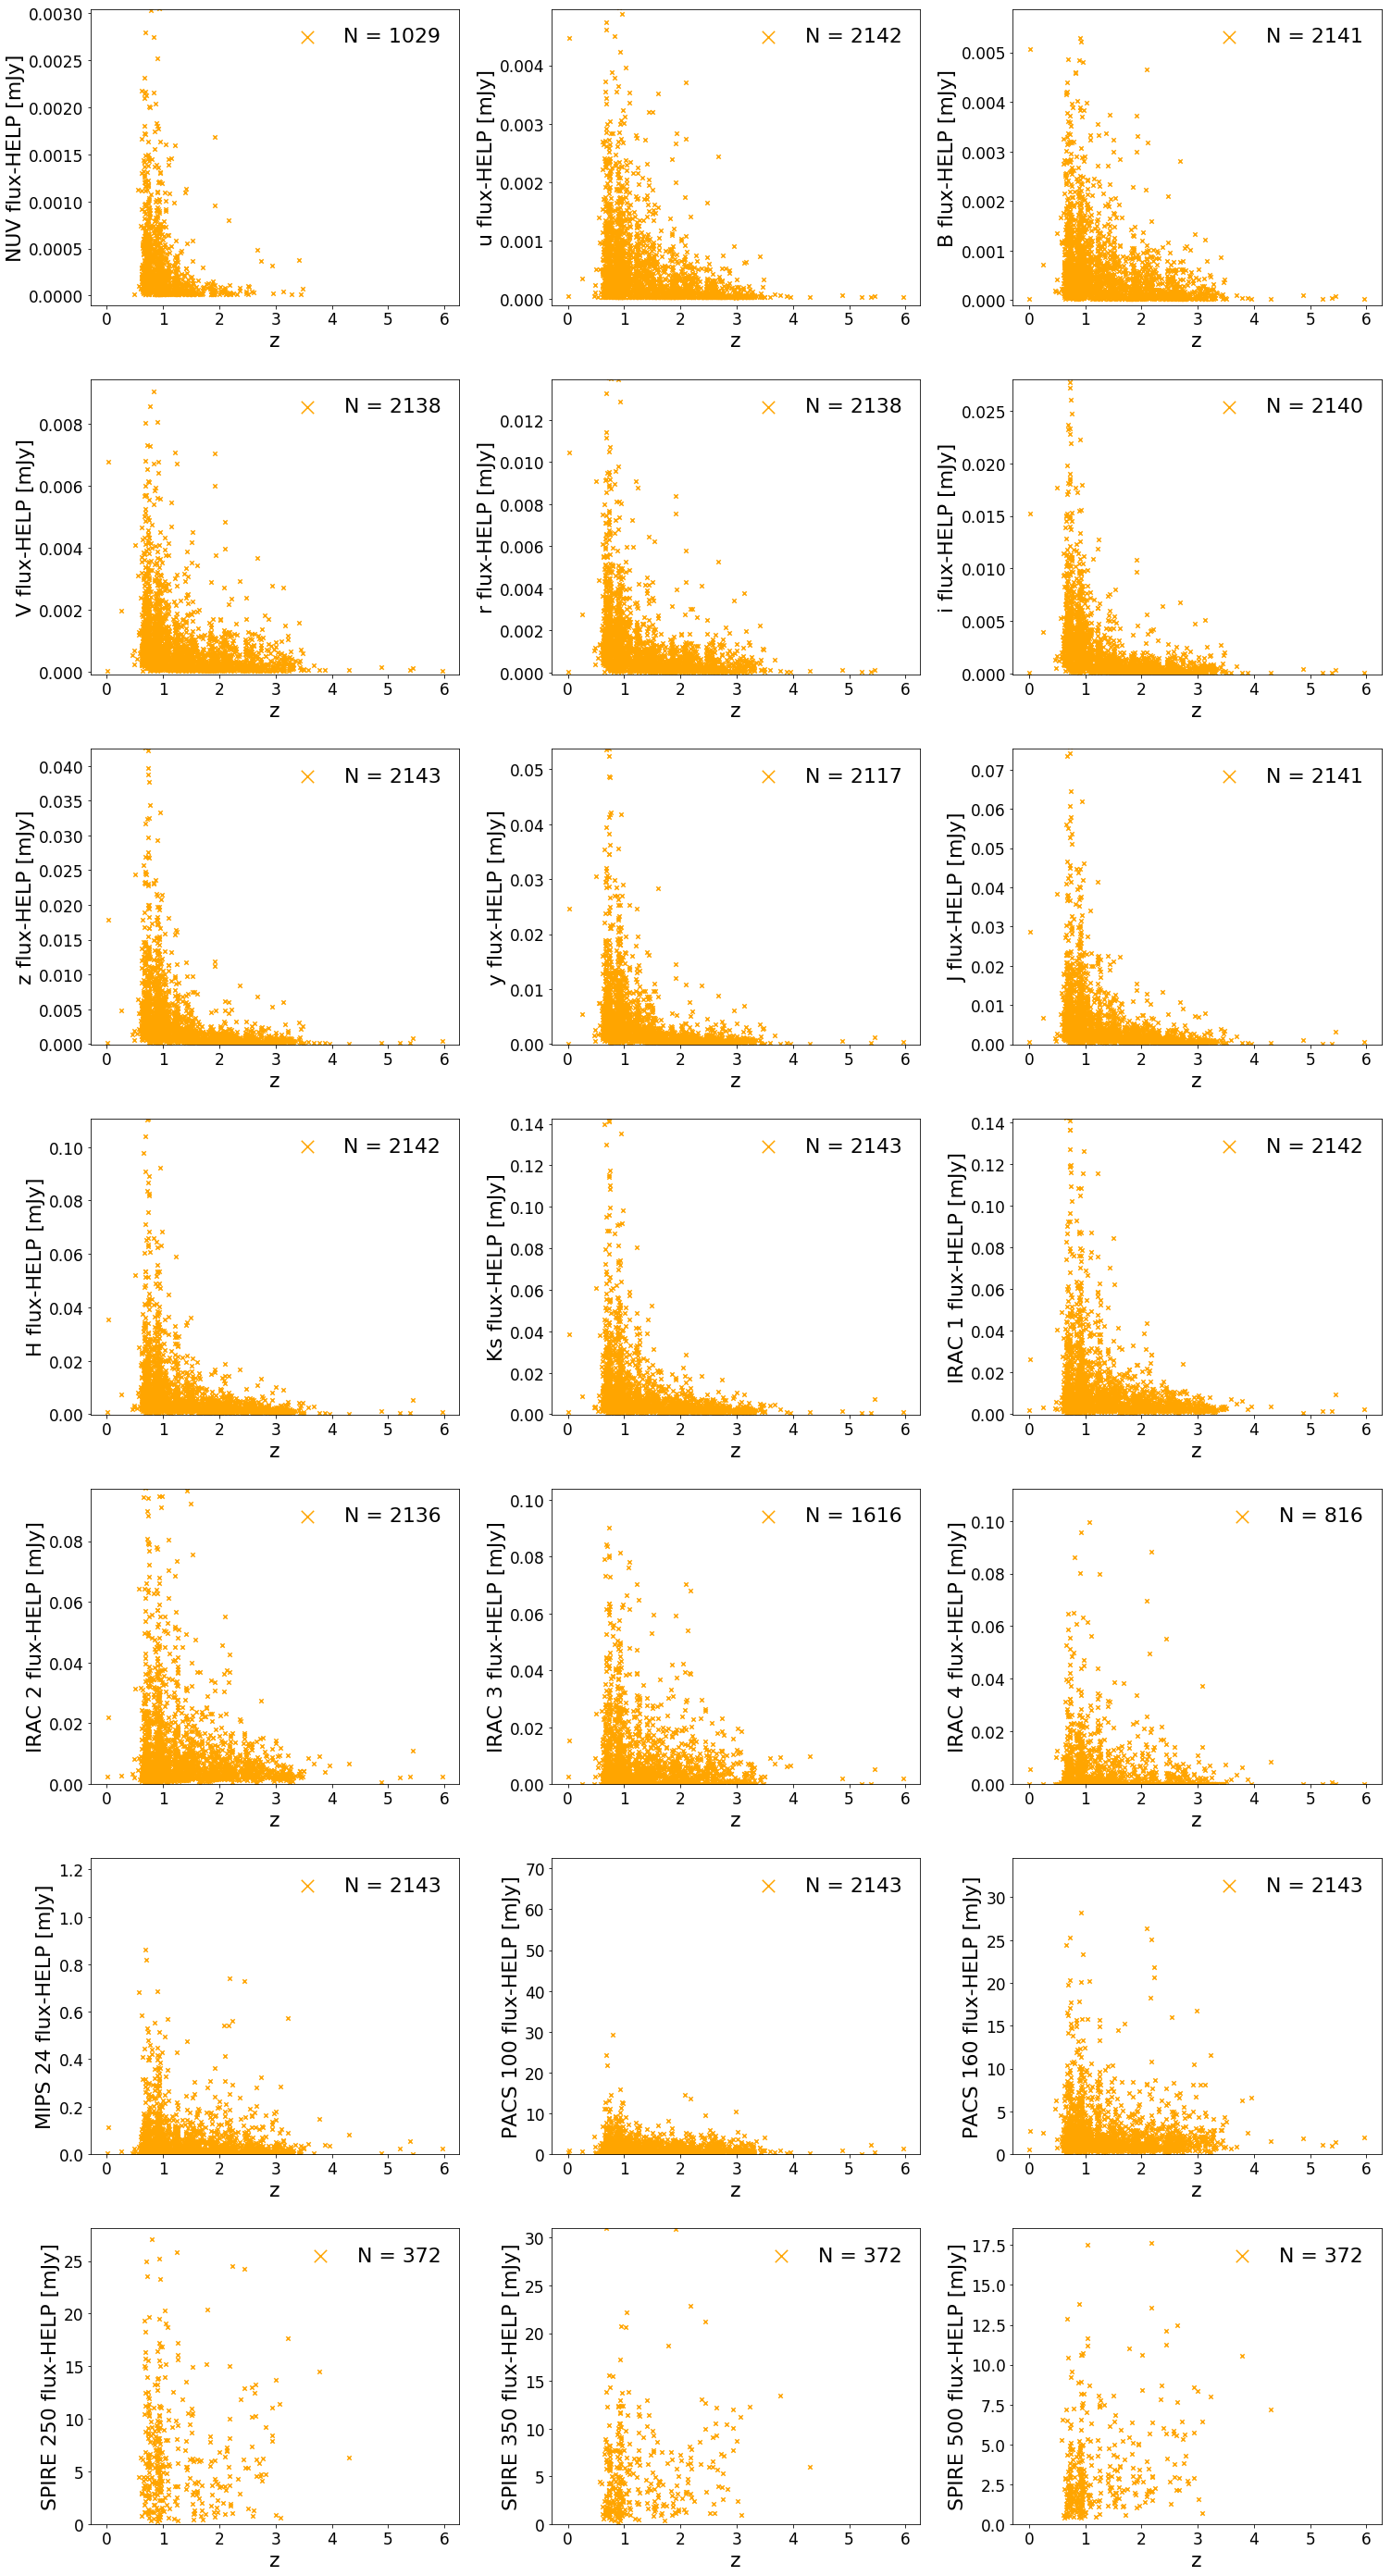

In [17]:
fig, axs = plt.subplots(7,3, figsize=(25, 50), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.25, wspace = 0.25)

axs = axs.ravel()

for i in range(len(bands)):
    
    data = HELP_COSMOS[bands[i]][HELP_COSMOS[bands[i]] > 0]

#     axs[i].scatter(HELP_COSMOS['redshift'], HELP_COSMOS[cigalon_bands[i]], s = 20, label = 'N = %i'%len(data),\
#                    c = 'orange', marker = 'x')
    axs[i].scatter(HELP_COSMOS['redshift'], HELP_COSMOS[bands[i]], s = 20, label = 'N = %i'%len(data),\
                   c = 'orange', marker = 'x')
    axs[i].set_ylim(-1e-4, np.nanpercentile(HELP_COSMOS[bands[i]], 99.8))
    axs[i].set_xlabel('z', fontsize = 22)
    axs[i].set_ylabel('%s flux-HELP [mJy]'%band_name[i], fontsize = 22)
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 17)
    axs[i].legend(frameon = False, prop = {'size': 22}, markerscale = 3, loc = 'upper right')

# Jin 

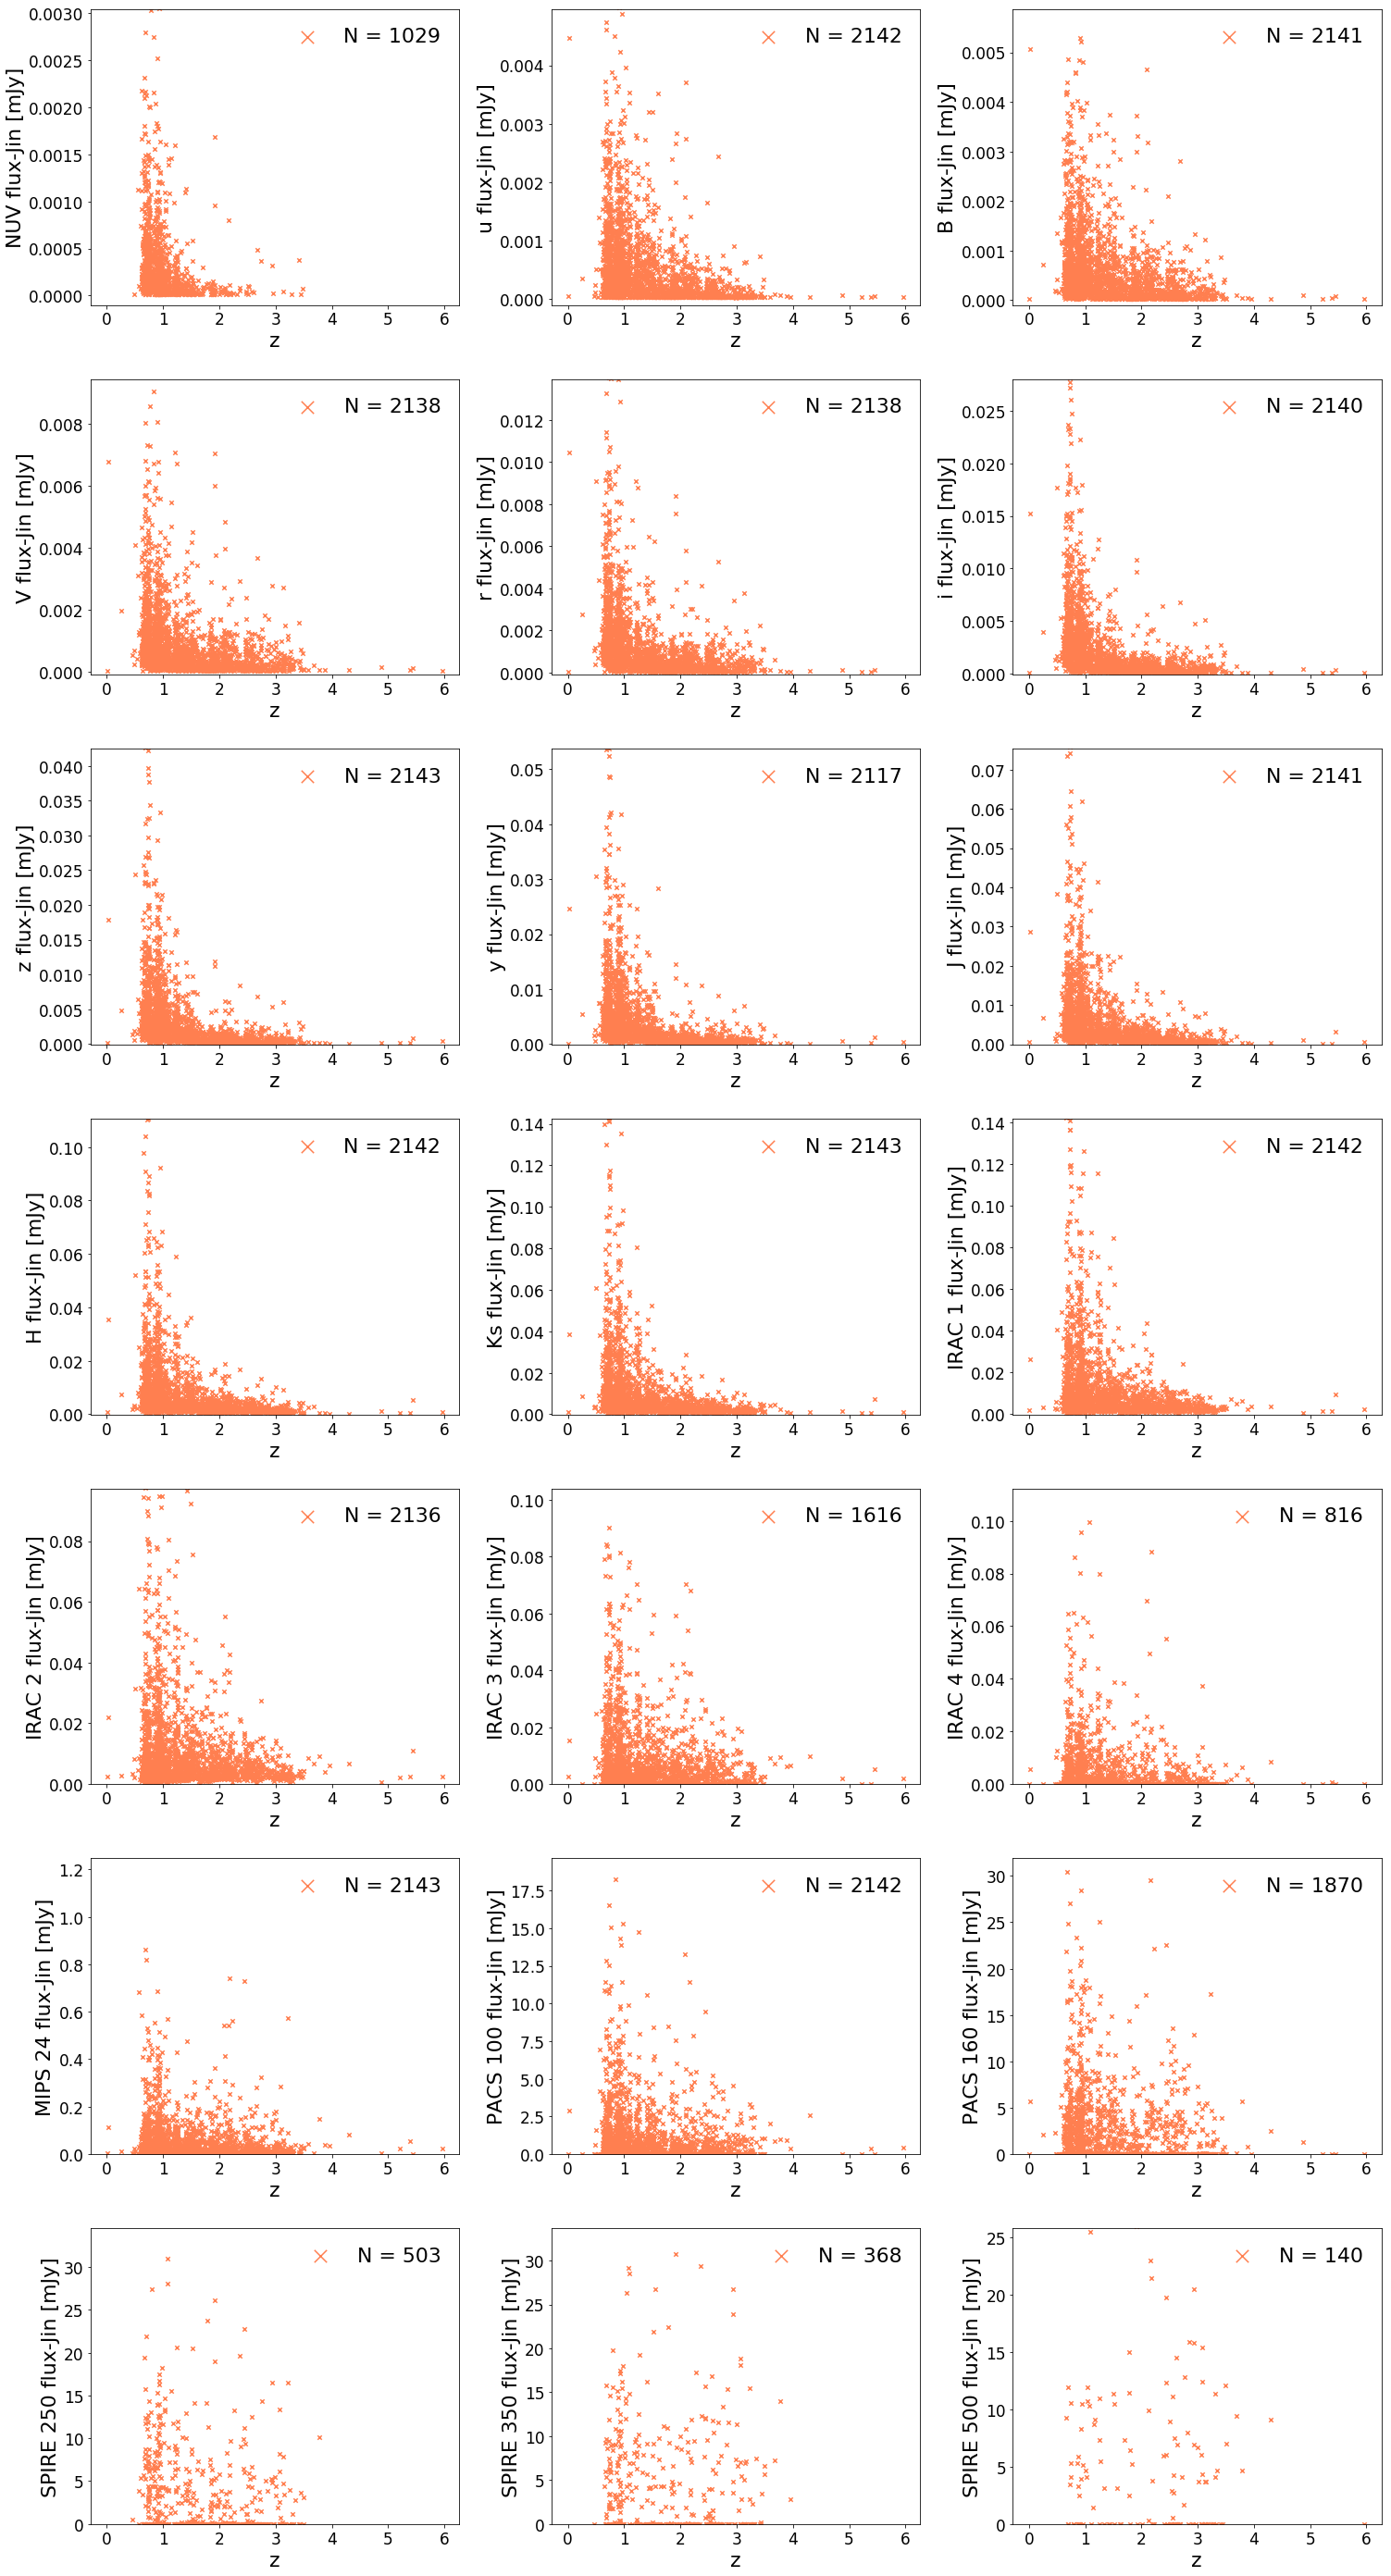

In [18]:
fig, axs = plt.subplots(7,3, figsize=(25, 50), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.25, wspace = 0.25)

axs = axs.ravel()

for i in range(len(bands)):
    
    data = JIN_COSMOS[bands[i]][JIN_COSMOS[bands[i]] > 0]

#     axs[i].scatter(JIN_COSMOS['redshift'], JIN_COSMOS[cigalon_bands[i]], s = 20, label = 'N = %i'%len(data),\
#                    c = 'coral', marker = 'x')
    axs[i].scatter(JIN_COSMOS['redshift'], JIN_COSMOS[bands[i]], s = 20, label = 'N = %i'%len(data),\
                   c = 'coral', marker = 'x')
    axs[i].set_ylim(-1e-4, np.nanpercentile(JIN_COSMOS[bands[i]], 99.8))
    axs[i].set_xlabel('z', fontsize = 22)
    axs[i].set_ylabel('%s flux-Jin [mJy]'%band_name[i], fontsize = 22)
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 17)
    axs[i].legend(frameon = False, prop = {'size': 22}, markerscale = 3, loc = 'upper right')

# Comparing both datasets

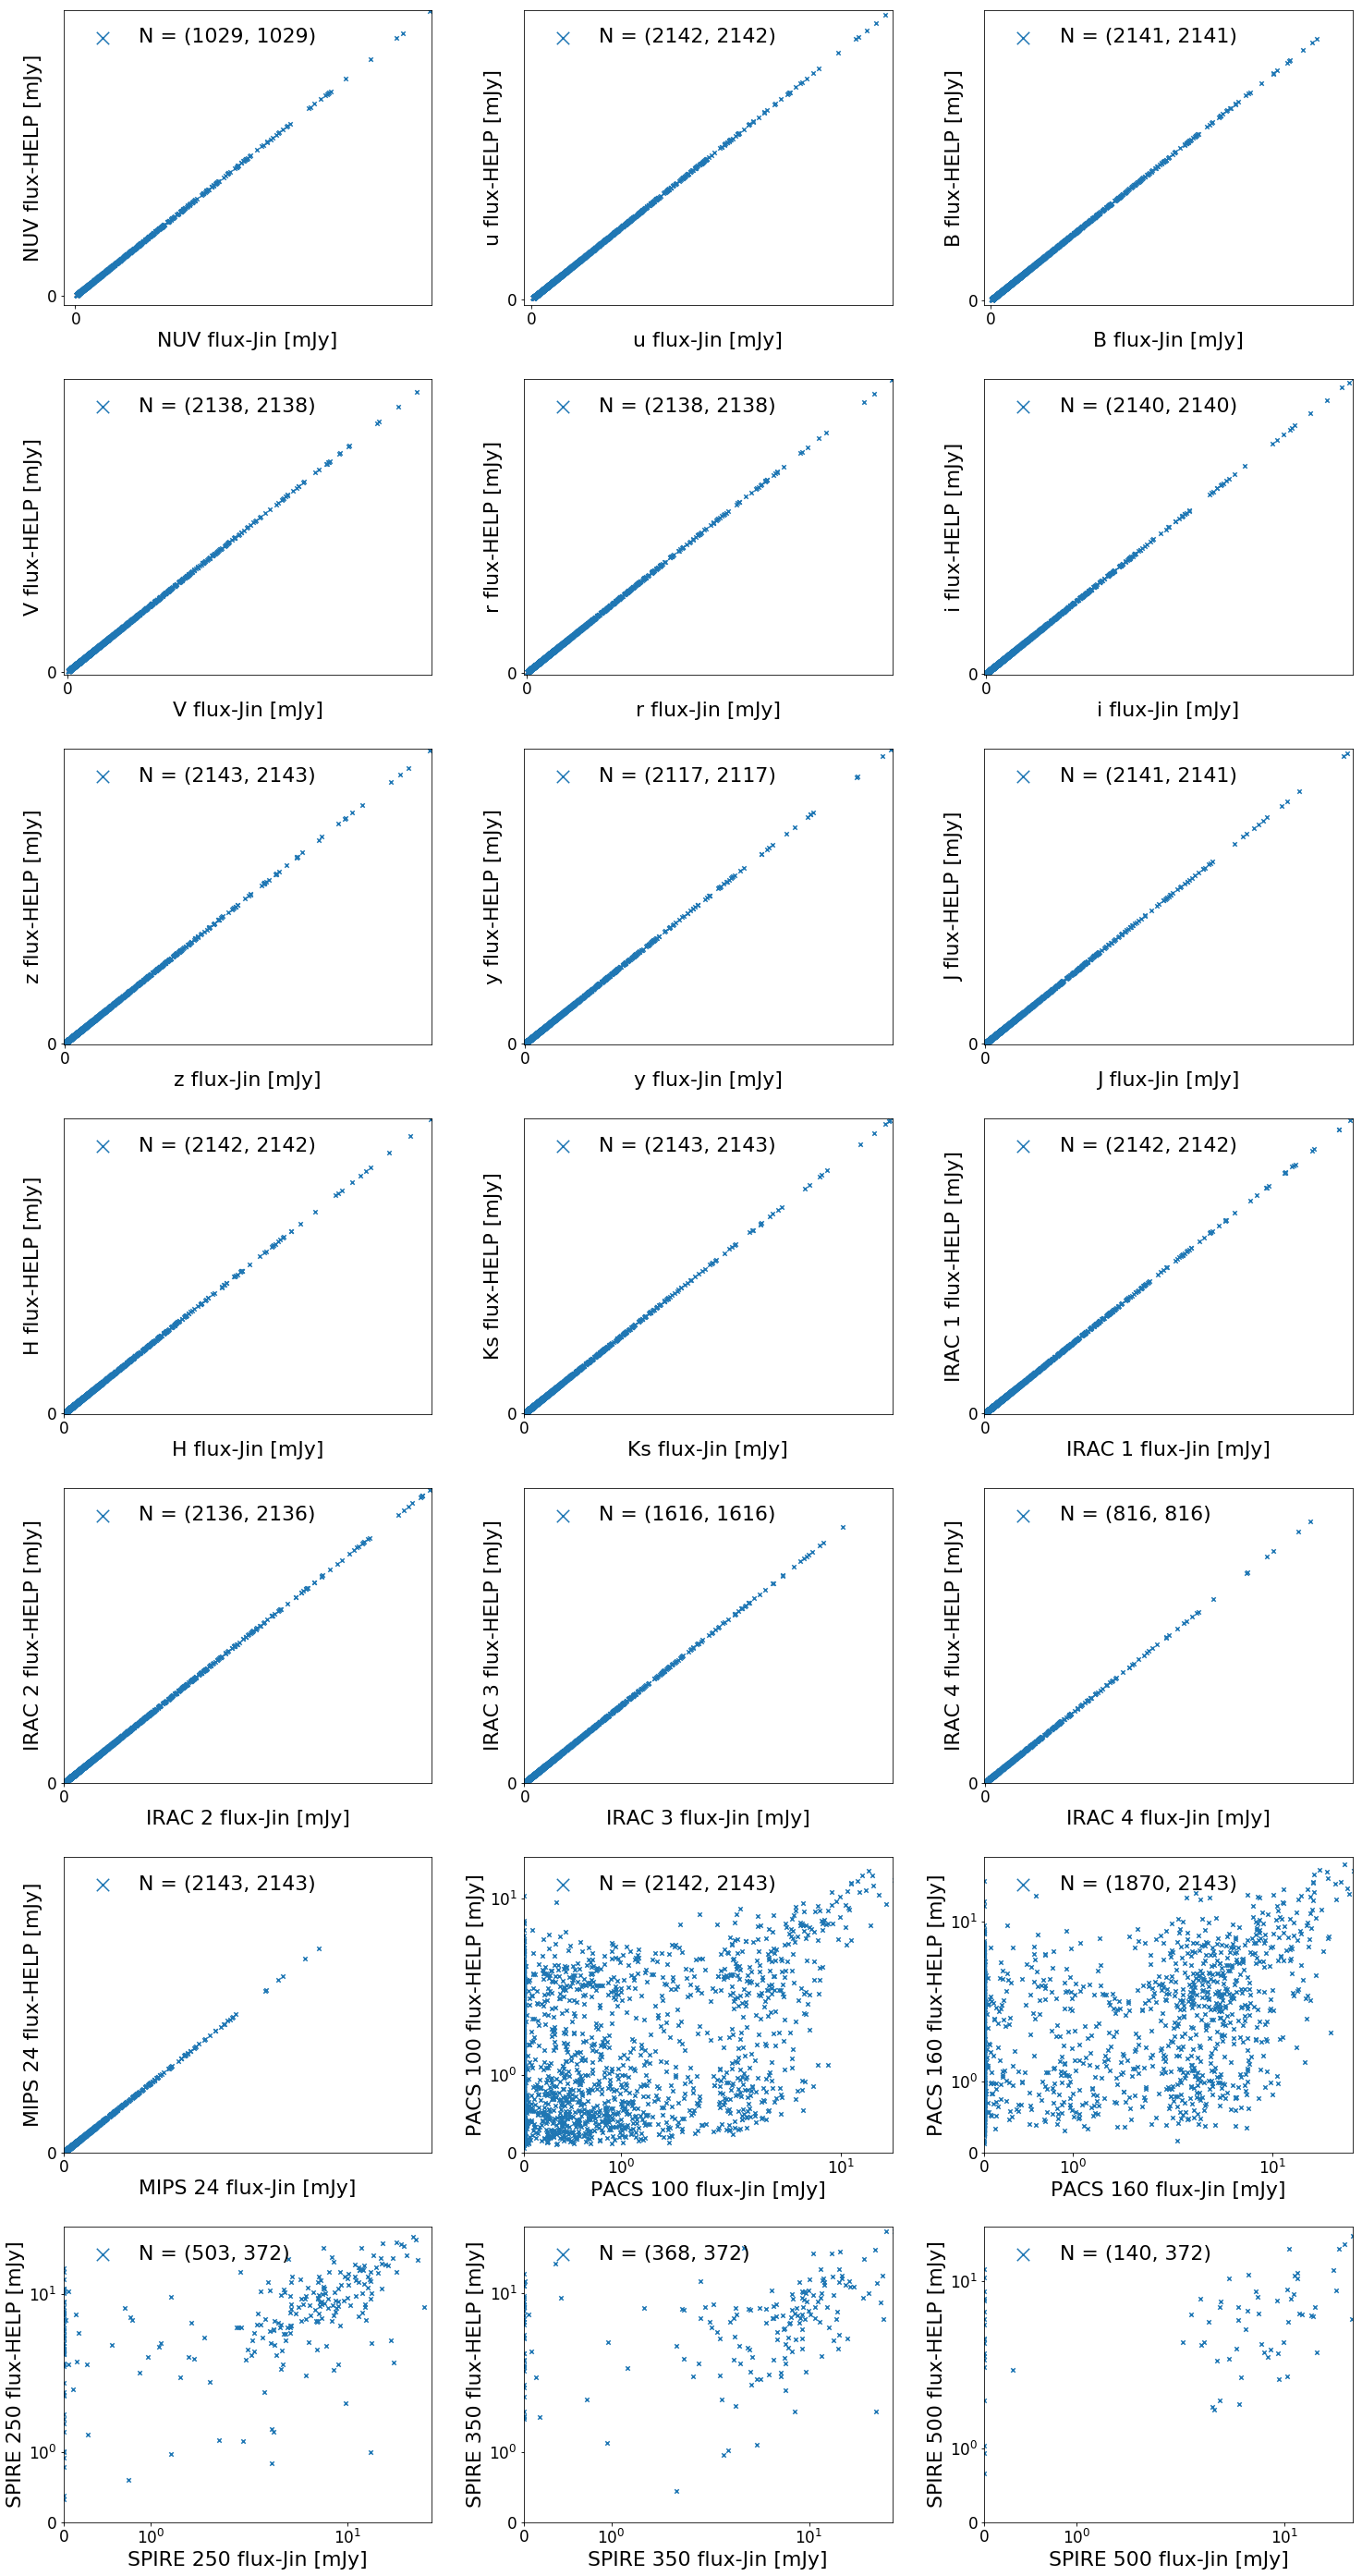

In [19]:
fig, axs = plt.subplots(7,3, figsize=(25, 50), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.25, wspace = 0.25)

axs = axs.ravel()

for i in range(len(bands)):
    
#     data_1 = JIN_COSMOS[cigalon_bands[i]][JIN_COSMOS[cigalon_bands[i]] > 0]
#     data_2 = HELP_COSMOS[cigalon_bands[i]][HELP_COSMOS[cigalon_bands[i]] > 0]
    
    data_1 = JIN_COSMOS[bands[i]][JIN_COSMOS[bands[i]] > 0]
    data_2 = HELP_COSMOS[bands[i]][HELP_COSMOS[bands[i]] > 0]

#     axs[i].scatter(JIN_COSMOS[cigalon_bands[i]], HELP_COSMOS[cigalon_bands[i]],\
#                    s = 20, label = 'N = (%i, %i)'%(len(data_1), len(data_2)),\
#                    c = 'C0', marker = 'x')
    axs[i].scatter(JIN_COSMOS[bands[i]], HELP_COSMOS[bands[i]],\
                   s = 20, label = 'N = (%i, %i)'%(len(data_1), len(data_2)),\
                   c = 'C0', marker = 'x')
    axs[i].set_yscale('symlog')
    axs[i].set_xscale('symlog')
    axs[i].set_xlim(-1e-4, np.nanpercentile(JIN_COSMOS[bands[i]], 99.8))
    axs[i].set_ylim(-1e-4, np.nanpercentile(JIN_COSMOS[bands[i]], 99.8))
    axs[i].set_xlabel('%s flux-Jin [mJy]'%band_name[i], fontsize = 22)
    axs[i].set_ylabel('%s flux-HELP [mJy]'%band_name[i], fontsize = 22)
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 17)
    axs[i].legend(frameon = False, prop = {'size': 22}, markerscale = 3, loc = 'upper left')

# SED retrieved fluxes vs original fluxes for different samples

In [130]:
# Results from SED fitting for a z restricted sample only using HELP photometry

# COSMOS_final_HELP_results = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/Jin_Daddi_COSMOS'
#                        '/SED-Fitting_results/COSMOS_final_results.fits', format = 'fits')

COSMOS_final_HELP_results = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/Jin_Daddi_COSMOS'
                       '/SED-Fitting_results/HELP-mysample_results.fits', format = 'fits')

COSMOS_final_JIN_results = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/Jin_Daddi_COSMOS'
                       '/SED-Fitting_results/JIN-mysample_results.fits', format = 'fits')

In [131]:
# cigale_bands = ['best.galex_nuv',\
#                 'best.megacam_u','best.suprime_b','best.suprime_v','best.suprime_r','best.suprime_i','best.suprime_z',\
#                 'best.suprime_y','best.vista_j','best.vista_h','best.vista_ks',\
#                 'best.IRAC_CH1','best.IRAC_CH2','best.IRAC_CH3','best.IRAC_CH4',\
#                 'best.mips_24','best.pacs_green','best.pacs_red',\
#                 'best.spire_250','best.spire_350','best.spire_500']



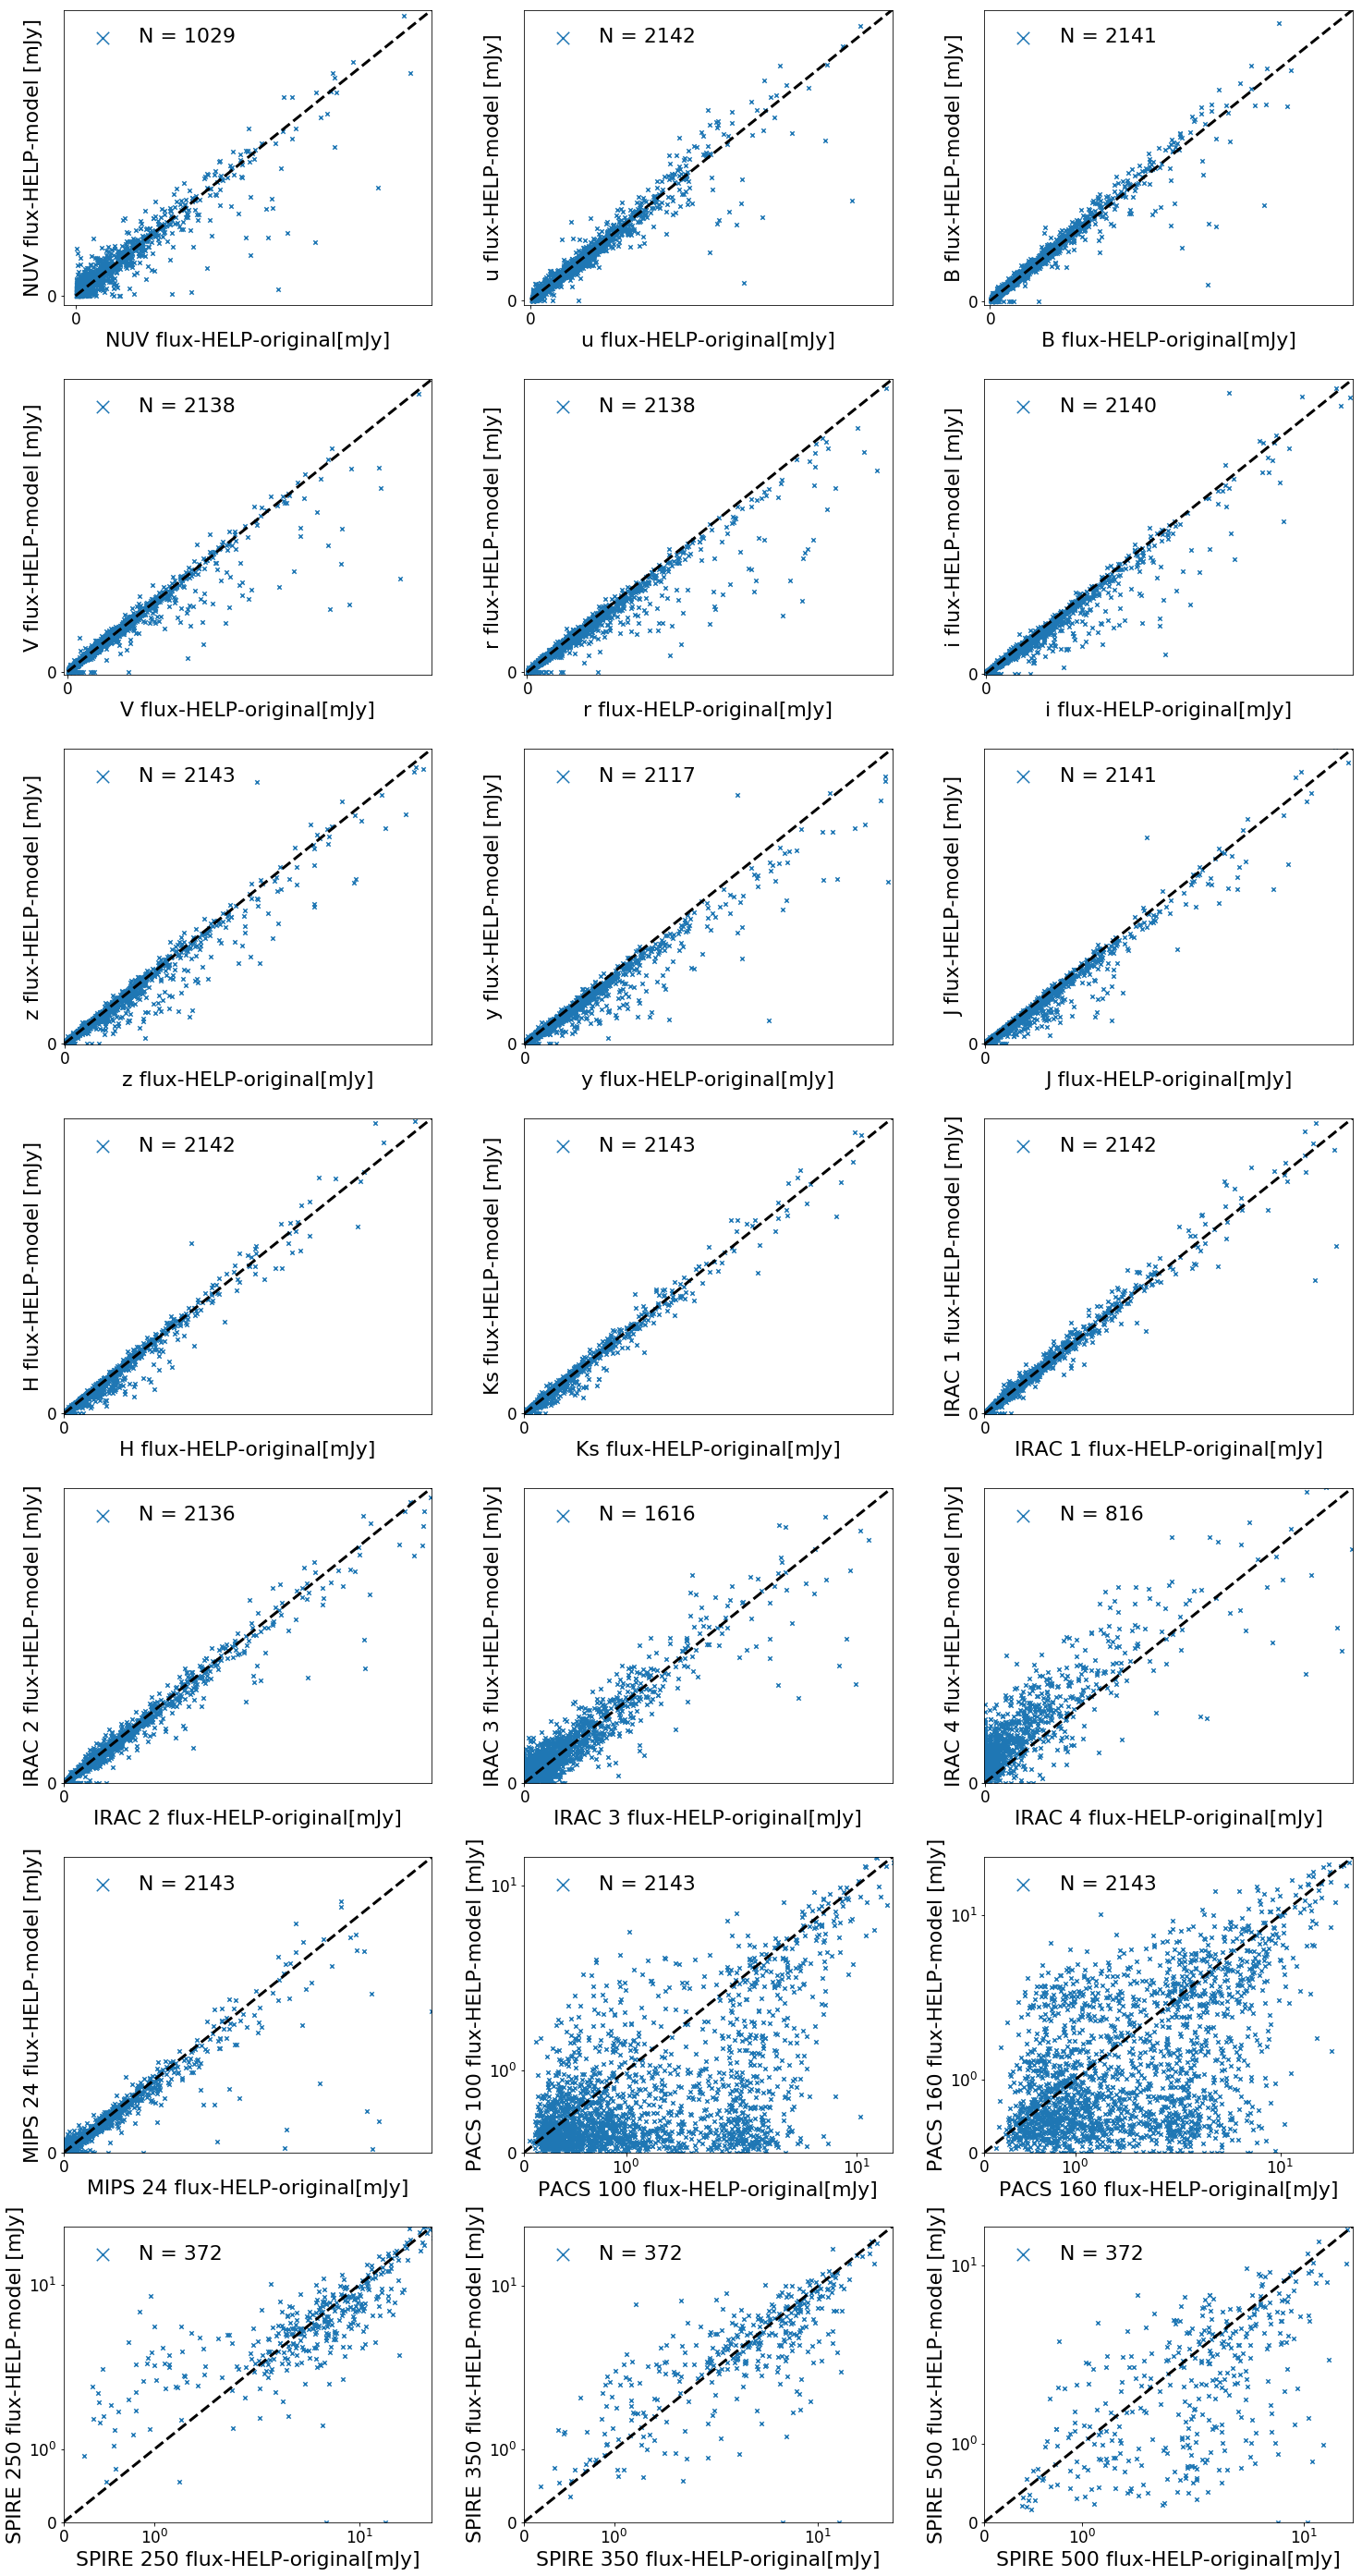

In [132]:
# Photomtry generated using CIGALE vs original measurements for HELP

X = np.linspace(0, 30, 50)

fig, axs = plt.subplots(7,3, figsize=(25, 50), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.25, wspace = 0.25)

axs = axs.ravel()

for i in range(len(bands)):
    
    data   = COSMOS_final_HELP_results[COSMOS_final_HELP_results[cigale_bands[i]] > 0]
    data_2 = final_sample_HELP_Jin[final_sample_HELP_Jin[bands[i]] > 0]

    axs[i].scatter(final_sample_HELP_Jin[bands[i]], COSMOS_final_HELP_results[cigale_bands[i]],\
                   s = 20, label = 'N = %i'%(len(data_2)),\
                   c = 'C0', marker = 'x')
    axs[i].plot(X, X, '--', lw = 3, c = 'k')
    axs[i].set_yscale('symlog')
    axs[i].set_xscale('symlog')
    axs[i].set_xlim(-1e-4, np.nanpercentile(COSMOS_final_HELP_results[cigale_bands[i]], 99.8))
    axs[i].set_ylim(-1e-4, np.nanpercentile(COSMOS_final_HELP_results[cigale_bands[i]], 99.8))
    axs[i].set_xlabel('%s flux-HELP-original[mJy]'%band_name[i], fontsize = 22)
    axs[i].set_ylabel('%s flux-HELP-model [mJy]'%band_name[i], fontsize = 22)
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 17)
    axs[i].legend(frameon = False, prop = {'size': 22}, markerscale = 3, loc = 'upper left')    

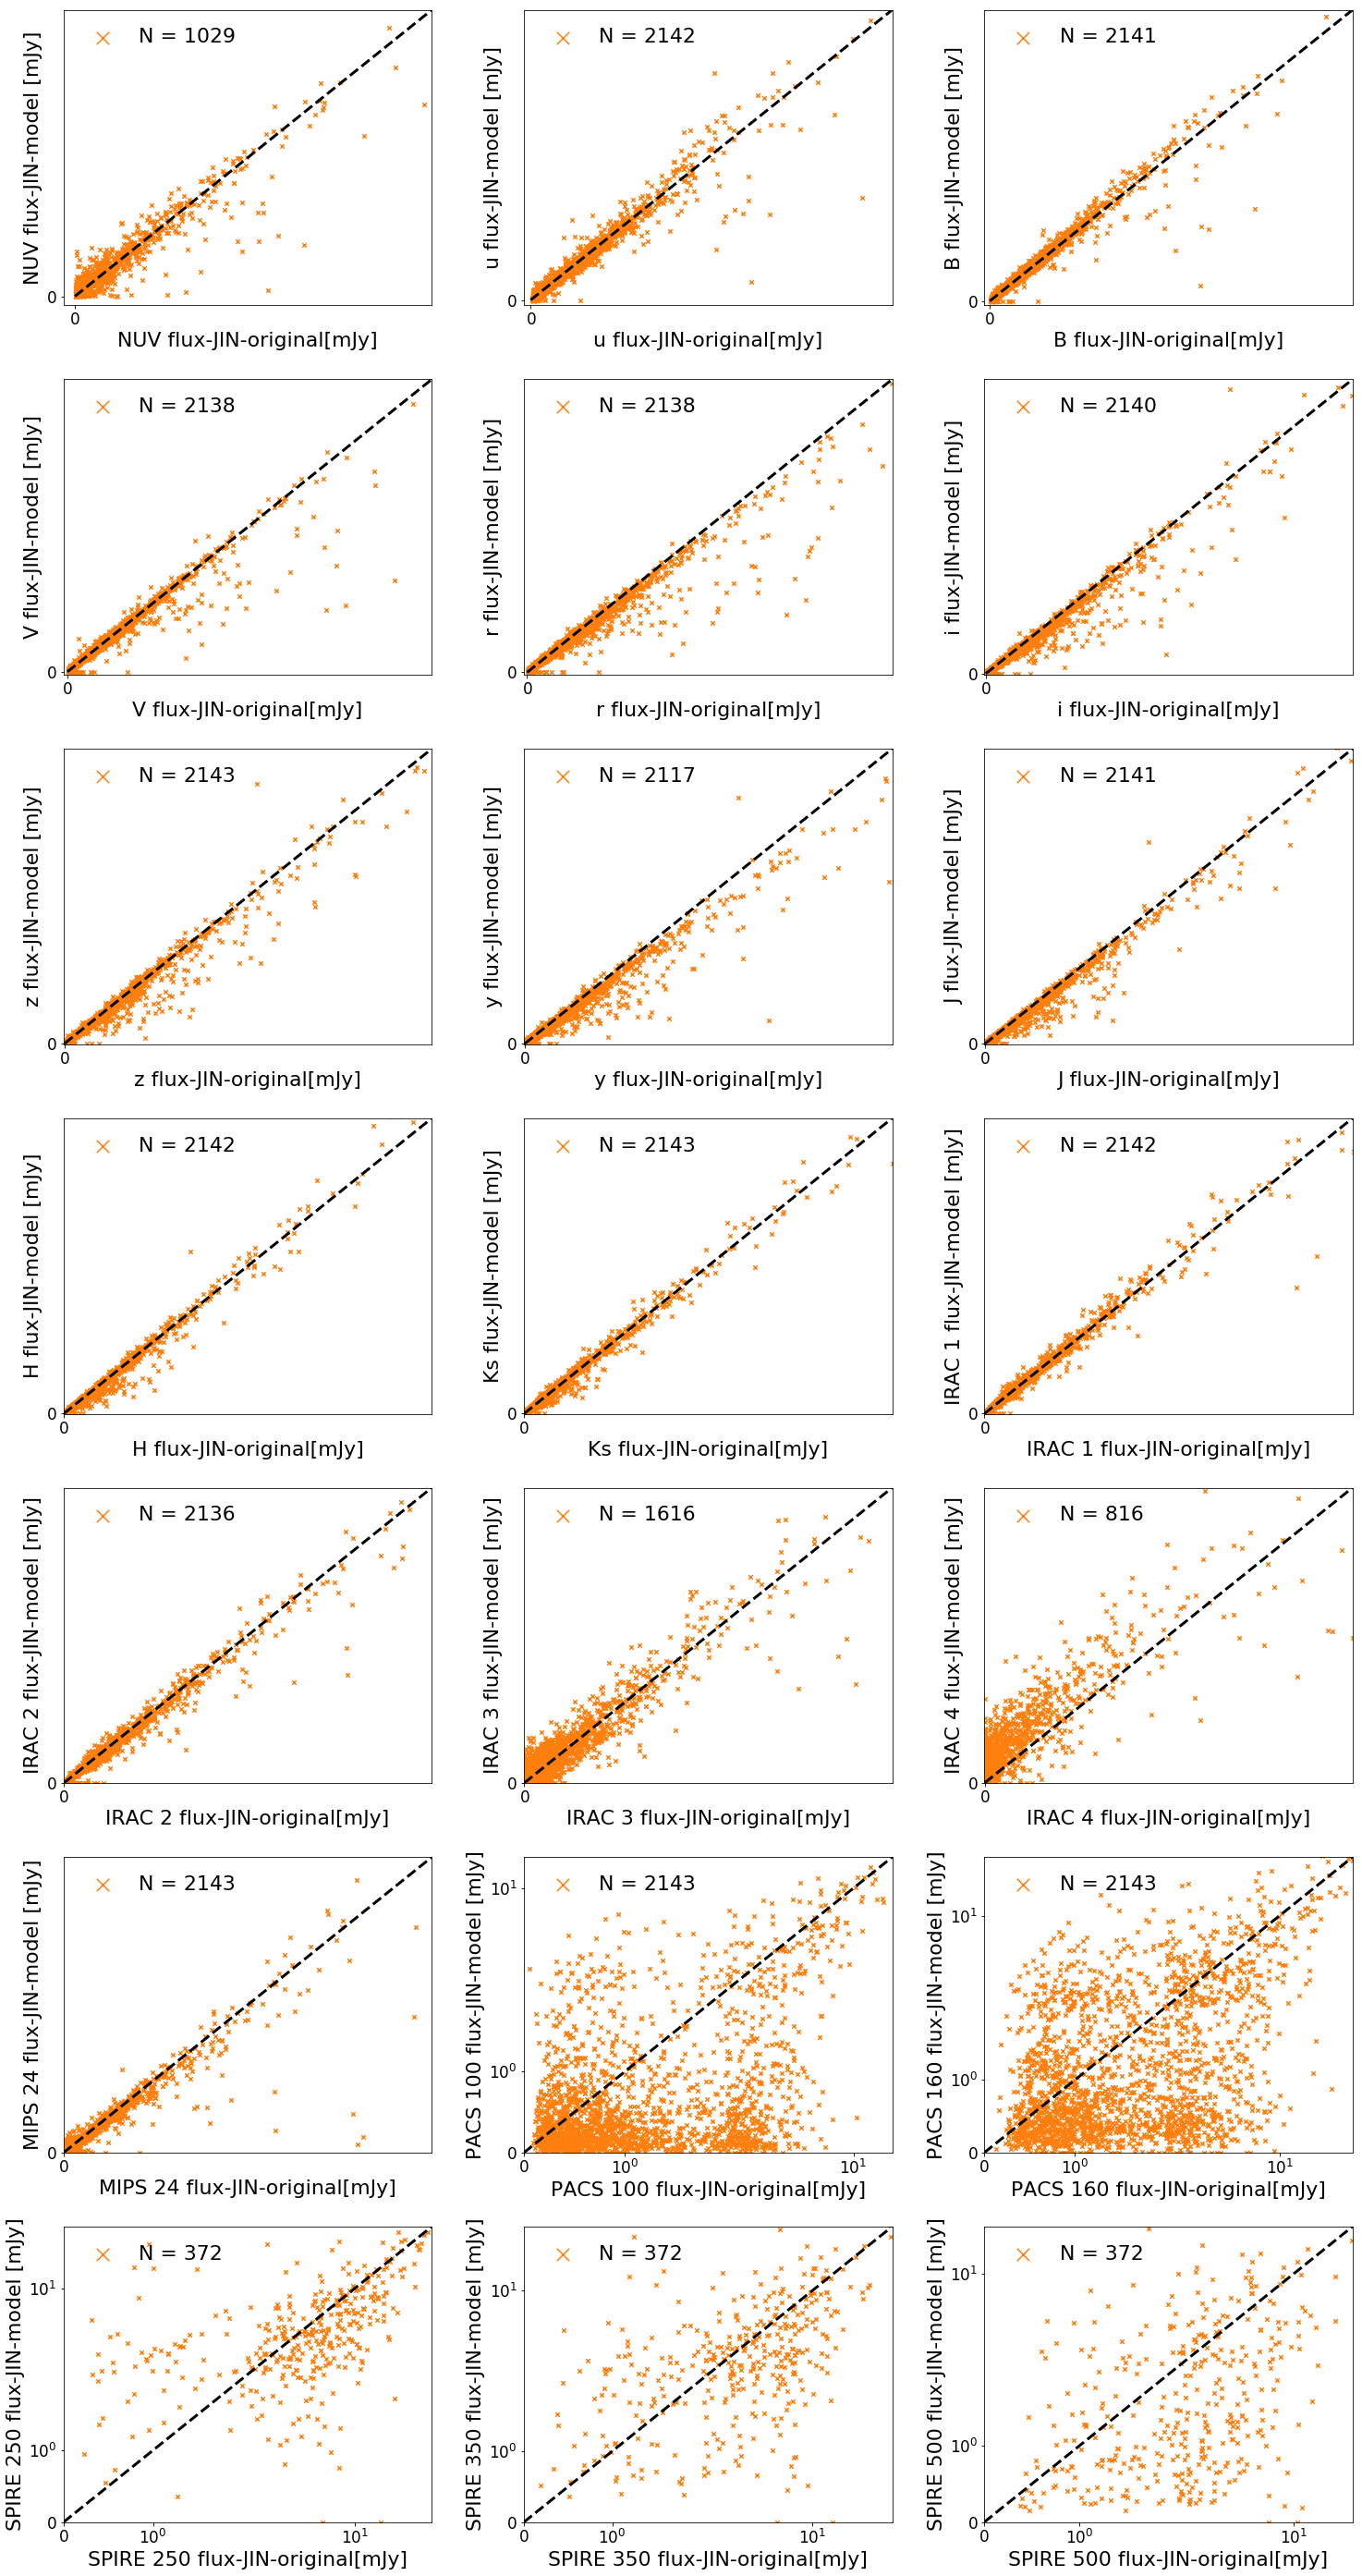

In [133]:
# Photomtry generated using CIGALE vs original measurements for Jin

X = np.linspace(0, 30, 50)

fig, axs = plt.subplots(7,3, figsize=(25, 50), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.25, wspace = 0.25)

axs = axs.ravel()

for i in range(len(bands)):
    
    data   = COSMOS_final_JIN_results[COSMOS_final_JIN_results[cigale_bands[i]] > 0]
    data_2 = final_sample_HELP_Jin[final_sample_HELP_Jin[bands[i]] > 0]

    axs[i].scatter(final_sample_HELP_Jin[bands[i]], COSMOS_final_JIN_results[cigale_bands[i]],\
                   s = 20, label = 'N = %i'%(len(data_2)),\
                   c = 'C1', marker = 'x')
    axs[i].plot(X, X, '--', lw = 3, c = 'k')
    axs[i].set_yscale('symlog')
    axs[i].set_xscale('symlog')
    axs[i].set_xlim(-1e-4, np.nanpercentile(COSMOS_final_JIN_results[cigale_bands[i]], 99.8))
    axs[i].set_ylim(-1e-4, np.nanpercentile(COSMOS_final_JIN_results[cigale_bands[i]], 99.8))
    axs[i].set_xlabel('%s flux-JIN-original[mJy]'%band_name[i], fontsize = 22)
    axs[i].set_ylabel('%s flux-JIN-model [mJy]'%band_name[i], fontsize = 22)
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 17)
    axs[i].legend(frameon = False, prop = {'size': 22}, markerscale = 3, loc = 'upper left')    

In [134]:
bands_errors = ['galex.NUV_err',\
                'cfht.megacam.u_err', 'subaru.suprime.B_err', 'subaru.suprime.V_err', 'subaru.suprime.r_err',\
                'subaru.suprime.i_err', 'subaru.suprime.z_err', 'subaru.hsc.y_err',\
                'UKIRT_WFCJ_err', 'cfht.wircam.H_err', 'WFCAM_K_err',\
                'IRAC1_err', 'IRAC2_err', 'IRAC3_err', 'IRAC4_err',\
                'spitzer.mips.24_err','herschel.pacs.100_err', 'herschel.pacs.160_err',\
                'herschel.spire.PSW_err', 'herschel.spire.PMW_err', 'herschel.spire.PLW_err']

bands_errors_jin = ['galex.NUV_err',\
                    'cfht.megacam.u_err', 'subaru.suprime.B_err', 'subaru.suprime.V_err', 'subaru.suprime.r_err',\
                    'subaru.suprime.i_err', 'subaru.suprime.z_err', 'subaru.hsc.y_err',\
                    'UKIRT_WFCJ_err', 'cfht.wircam.H_err', 'WFCAM_K_err',\
                    'IRAC1_err', 'IRAC2_err', 'IRAC3_err', 'IRAC4_err',\
                    'spitzer.mips.24_err','DF100', 'DF160',\
                    'DF250', 'DF350', 'DF500']

/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in log10
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log10


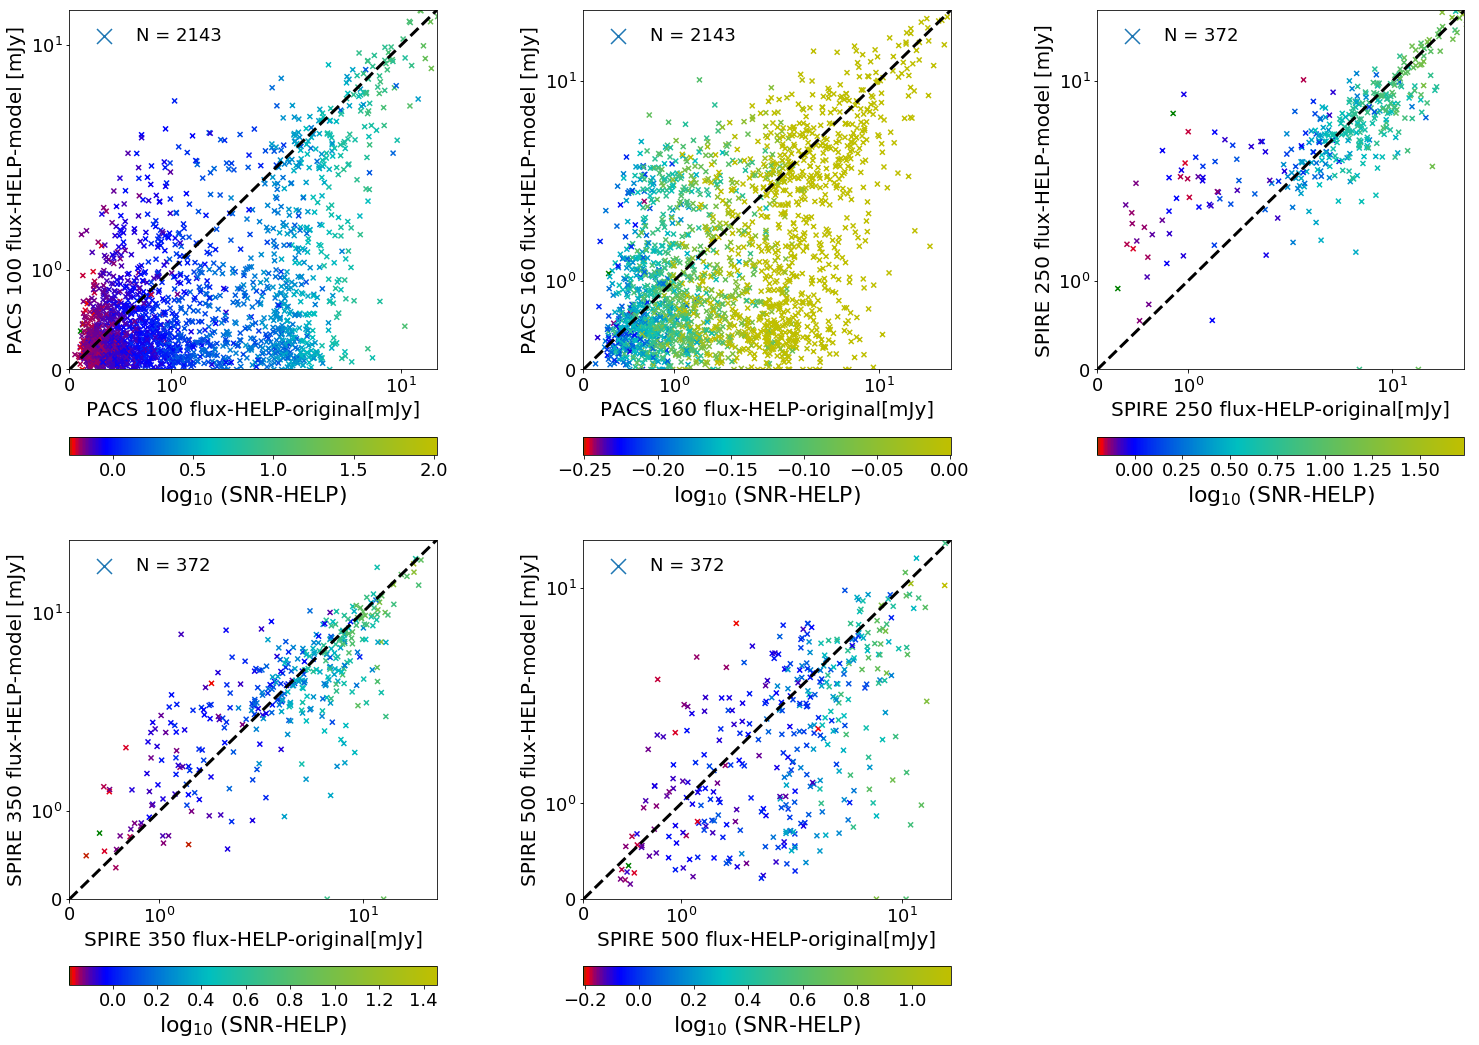

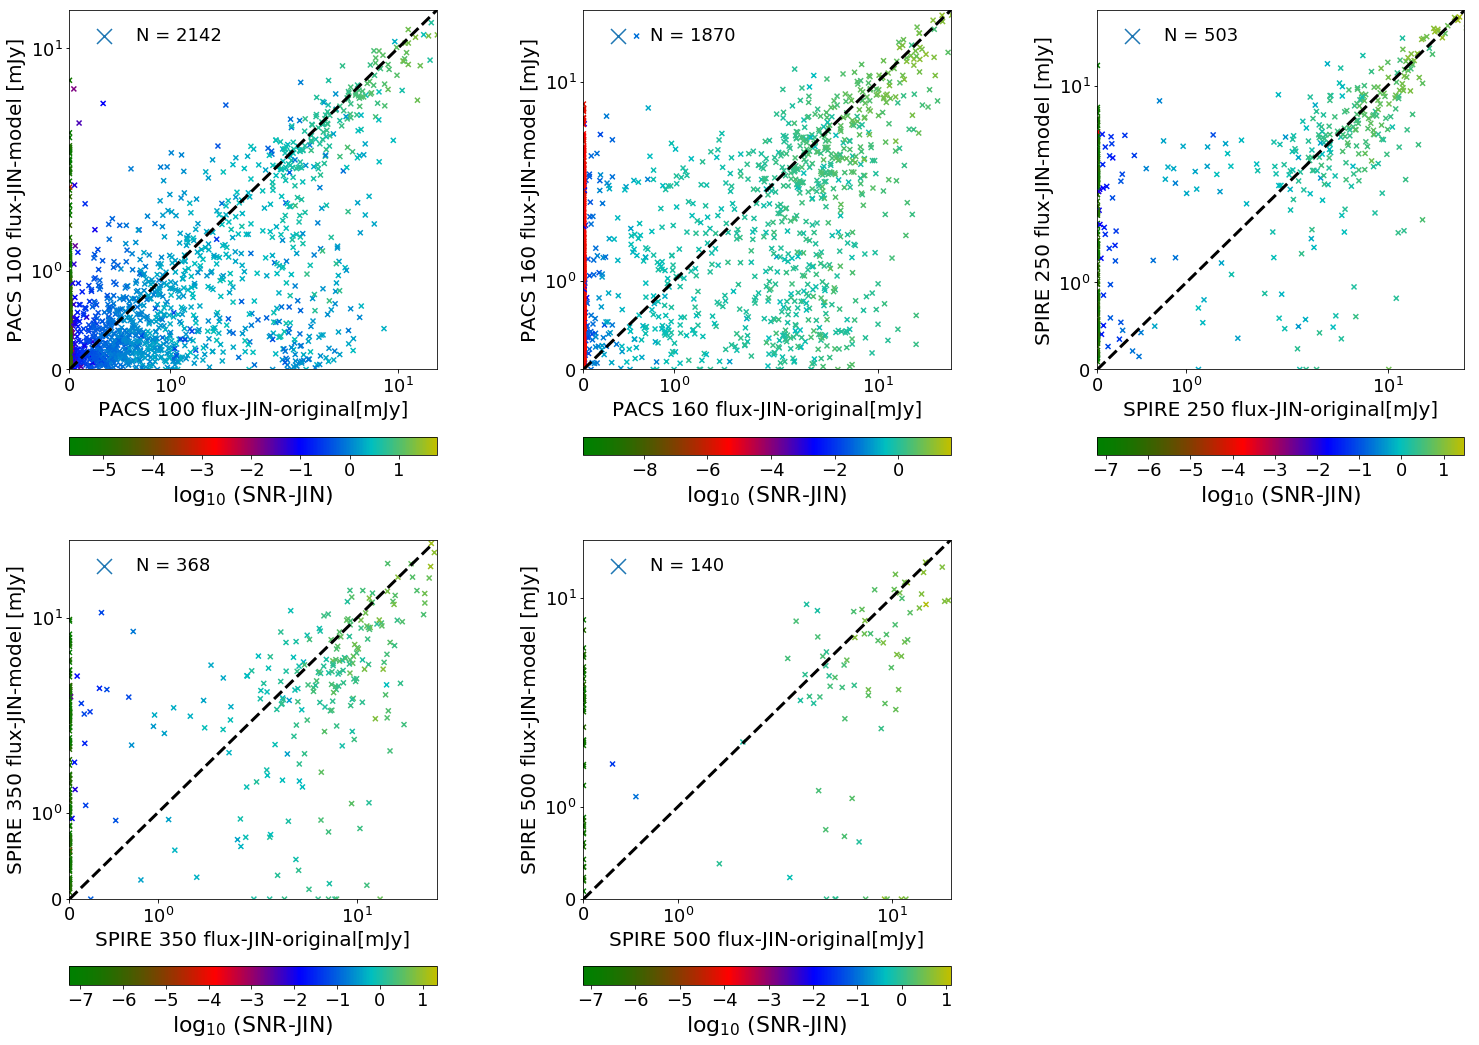

In [135]:
X = np.linspace(0, 30, 50)

# Plots for HELP modeled and measured data 

fig, axs = plt.subplots(2,3, figsize=(25, 18), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.18, wspace = 0.4)
axs[-1, -1].axis('off')

axs = axs.ravel()

# Special color map. Gamma controls the upper and lower limits giving different weights
cmap = colors.LinearSegmentedColormap.from_list('nameofcolormap',['g', 'r', 'b', 'c', 'y'],gamma=0.3)

for i in range(16, 21): 
    
    data   = COSMOS_final_HELP_results[COSMOS_final_HELP_results[cigale_bands[i]] > 0]
    data_2 = final_sample_HELP_Jin[final_sample_HELP_Jin[bands[i]] > 0]
    
    snr = final_sample_HELP_Jin[bands[i]]/final_sample_HELP_Jin[bands_errors[i]]    

    sc = axs[i-16].scatter(final_sample_HELP_Jin[bands[i]], COSMOS_final_HELP_results[cigale_bands[i]],\
                           s = 25, label = 'N = %i'%(len(data_2)),\
                           marker = 'x', c = np.log10(snr), cmap = cmap)

    clb = plt.colorbar(sc, ax = axs[i-16], fraction = 0.05, pad = 0.15, orientation = 'horizontal')
    clb.set_label(label = r'$\log_{10}$ (SNR-HELP)', size = 22)
    clb.ax.tick_params(labelsize = 18)
    
    axs[i-16].plot(X, X, '--', lw = 3, c = 'k')
    axs[i-16].set_yscale('symlog')
    axs[i-16].set_xscale('symlog')
    axs[i-16].set_xlim(-1e-4, np.nanpercentile(COSMOS_final_HELP_results[cigale_bands[i]], 99.8))
    axs[i-16].set_ylim(-1e-4, np.nanpercentile(COSMOS_final_HELP_results[cigale_bands[i]], 99.8))
    axs[i-16].set_xlabel('%s flux-HELP-original[mJy]'%band_name[i], fontsize = 20)
    axs[i-16].set_ylabel('%s flux-HELP-model [mJy]'%band_name[i], fontsize = 20)
    axs[i-16].tick_params(axis = 'both', which = 'major', labelsize = 18)
    axs[i-16].legend(frameon = False, prop = {'size': 18}, markerscale = 3, loc = 'upper left') 

# Plots for Jin modeled and measured data 
  
fig, axs = plt.subplots(2,3, figsize=(25, 18), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.18, wspace = 0.4)
axs[-1, -1].axis('off')

axs = axs.ravel()

#Special color map. Gamma controls the upper and lower limits giving different weights
cmap = colors.LinearSegmentedColormap.from_list('nameofcolormap',['g', 'r', 'b', 'c', 'y'],gamma=1.5)

for i in range(16, 21): 
    
    data   = COSMOS_final_JIN_results[COSMOS_final_JIN_results[cigale_bands[i]] > 0]
    data_2 = final_sample_HELP_Jin[final_sample_HELP_Jin[bands_jin[i]] > 0]
    
    snr = final_sample_HELP_Jin[bands_jin[i]]/final_sample_HELP_Jin[bands_errors_jin[i]]    

    sc = axs[i-16].scatter(final_sample_HELP_Jin[bands_jin[i]], COSMOS_final_JIN_results[cigale_bands[i]],\
                           s = 25, label = 'N = %i'%(len(data_2)),\
                           marker = 'x', c = np.log10(snr), cmap = cmap)

    clb = plt.colorbar(sc, ax = axs[i-16], fraction = 0.05, pad = 0.15, orientation = 'horizontal')
    clb.set_label(label = r'$\log_{10}$ (SNR-JIN)', size = 22)
    clb.ax.tick_params(labelsize = 18)
    
    axs[i-16].plot(X, X, '--', lw = 3, c = 'k')
    axs[i-16].set_yscale('symlog')
    axs[i-16].set_xscale('symlog')
    axs[i-16].set_xlim(-1e-4, np.nanpercentile(COSMOS_final_JIN_results[cigale_bands[i]], 99.8))
    axs[i-16].set_ylim(-1e-4, np.nanpercentile(COSMOS_final_JIN_results[cigale_bands[i]], 99.8))
    axs[i-16].set_xlabel('%s flux-JIN-original[mJy]'%band_name[i], fontsize = 20)
    axs[i-16].set_ylabel('%s flux-JIN-model [mJy]'%band_name[i], fontsize = 20)
    axs[i-16].tick_params(axis = 'both', which = 'major', labelsize = 18)
    axs[i-16].legend(frameon = False, prop = {'size': 18}, markerscale = 3, loc = 'upper left')     

# Model and measured lines

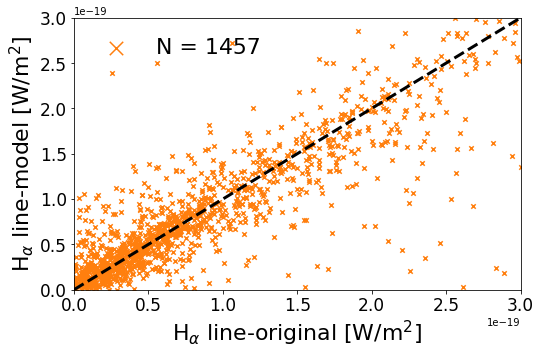

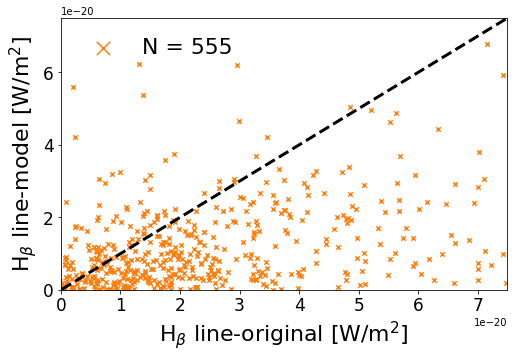

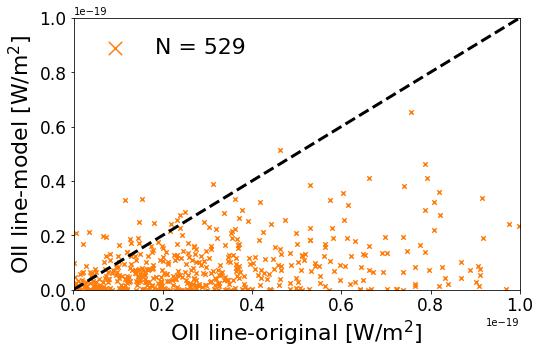

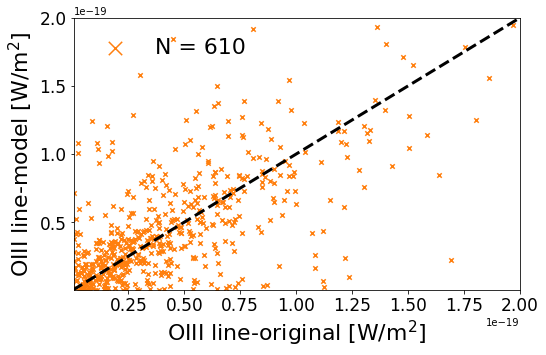

In [142]:
line_name = [r'H$_\alpha$', r'H$_\beta$', 'OII', 'OIII']

X = np.linspace(1e-22, 3e-19, 50)

data_1 = final_sample_HELP_Jin[final_sample_HELP_Jin[lines[0]] > 0]

plt.figure(figsize = (8, 5))
plt.scatter(final_sample_HELP_Jin[lines[0]], COSMOS_final_HELP_results[model_lines[0]],\
            s = 20, label = 'N = %i'%(len(data_1)), c = 'C1', marker = 'x')
# plt.scatter(final_sample_HELP_Jin[lines[0]], COSMOS_final_JIN_results[model_lines[0]],\
#             s = 20, label = 'N = %i'%(len(data_1)), c = 'C2', marker = 'x')
plt.plot(X, X, '--', lw = 3, c = 'k')
plt.xlim(1e-22, 3e-19)
plt.ylim(1e-22, 3e-19) 
# plt.yscale('symlog')
# plt.xscale('symlog')
plt.xlabel(r'%s line-original [W/m$^2$]'%line_name[0], fontsize = 22)
plt.ylabel(r'%s line-model [W/m$^2$]'%line_name[0], fontsize = 22)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(frameon = False, prop = {'size': 22}, markerscale = 3, loc = 'upper left')

data_2 = final_sample_HELP_Jin[final_sample_HELP_Jin[lines[1]] > 0]

plt.figure(figsize = (8, 5))
plt.scatter(final_sample_HELP_Jin[lines[1]], COSMOS_final_HELP_results[model_lines[1]],\
            s = 20, label = 'N = %i'%(len(data_2)), c = 'C1', marker = 'x')
# plt.scatter(final_sample_HELP_Jin[lines[1]], COSMOS_final_JIN_results[model_lines[1]],\
#             s = 20, label = 'N = %i'%(len(data_2)), c = 'C2', marker = 'x')
plt.plot(X, X, '--', lw = 3, c = 'k')
plt.xlim(0.2e-22, 0.75e-19)
plt.ylim(0.2e-22, 0.75e-19) 
# plt.yscale('symlog')
# plt.xscale('symlog')
plt.xlabel(r'%s line-original [W/m$^2$]'%line_name[1], fontsize = 22)
plt.ylabel(r'%s line-model [W/m$^2$]'%line_name[1], fontsize = 22)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(frameon = False, prop = {'size': 22}, markerscale = 3, loc = 'upper left')

data_3 = final_sample_HELP_Jin[final_sample_HELP_Jin[lines[2]] > 0]

plt.figure(figsize = (8, 5))
plt.scatter(final_sample_HELP_Jin[lines[2]], COSMOS_final_HELP_results[model_lines[2]],\
            s = 20, label = 'N = %i'%(len(data_3)), c = 'C1', marker = 'x')
# plt.scatter(final_sample_HELP_Jin[lines[2]], COSMOS_final_JIN_results[model_lines[2]],\
#             s = 20, label = 'N = %i'%(len(data_3)), c = 'C2', marker = 'x')
plt.plot(X, X, '--', lw = 3, c = 'k')
plt.xlim(0.2e-22, 1e-19)
plt.ylim(0.2e-22, 1e-19) 
# plt.yscale('symlog')
# plt.xscale('symlog')
plt.xlabel(r'%s line-original [W/m$^2$]'%line_name[2], fontsize = 22)
plt.ylabel(r'%s line-model [W/m$^2$]'%line_name[2], fontsize = 22)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(frameon = False, prop = {'size': 22}, markerscale = 3, loc = 'upper left')

data_4 = final_sample_HELP_Jin[final_sample_HELP_Jin[lines[3]] > 0]

plt.figure(figsize = (8, 5))
plt.scatter(final_sample_HELP_Jin[lines[3]], COSMOS_final_HELP_results[model_lines[3]],\
            s = 20, label = 'N = %i'%(len(data_4)), c = 'C1', marker = 'x')
# plt.scatter(final_sample_HELP_Jin[lines[3]], COSMOS_final_JIN_results[model_lines[3]],\
#             s = 20, label = 'N = %i'%(len(data_4)), c = 'C2', marker = 'x')
plt.plot(X, X, '--', lw = 3, c = 'k')
plt.xlim(5e-22, 2e-19)
plt.ylim(5e-22, 2e-19) 
# plt.yscale('symlog')
# plt.xscale('symlog')
plt.xlabel(r'%s line-original [W/m$^2$]'%line_name[3], fontsize = 22)
plt.ylabel(r'%s line-model [W/m$^2$]'%line_name[3], fontsize = 22)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(frameon = False, prop = {'size': 22}, markerscale = 3, loc = 'upper left');

/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log10
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in log10
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in log10
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in log10


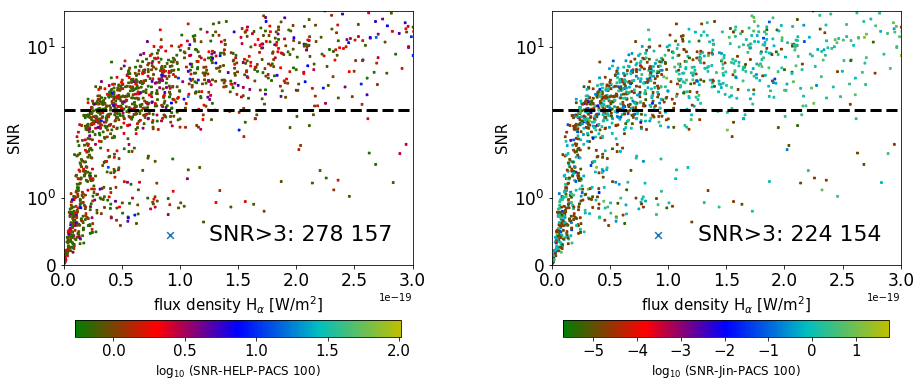

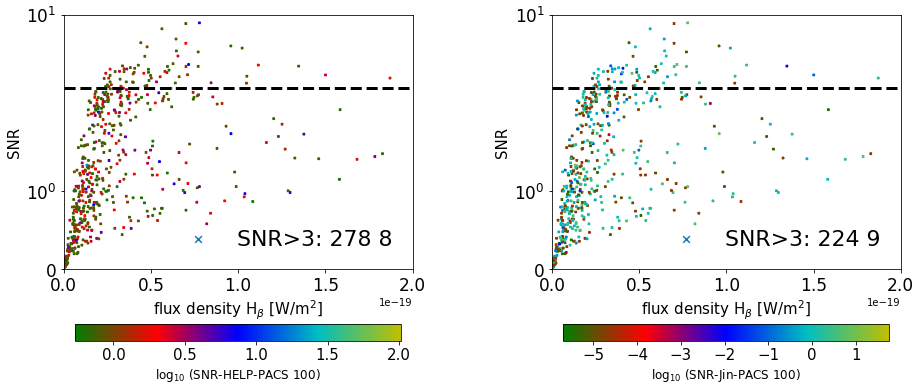

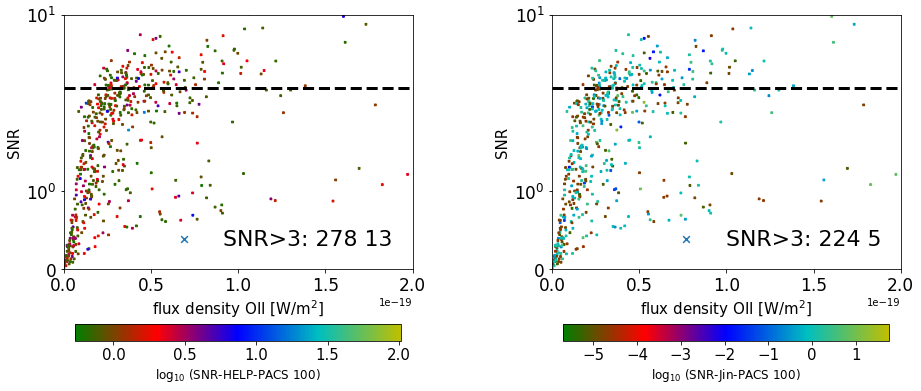

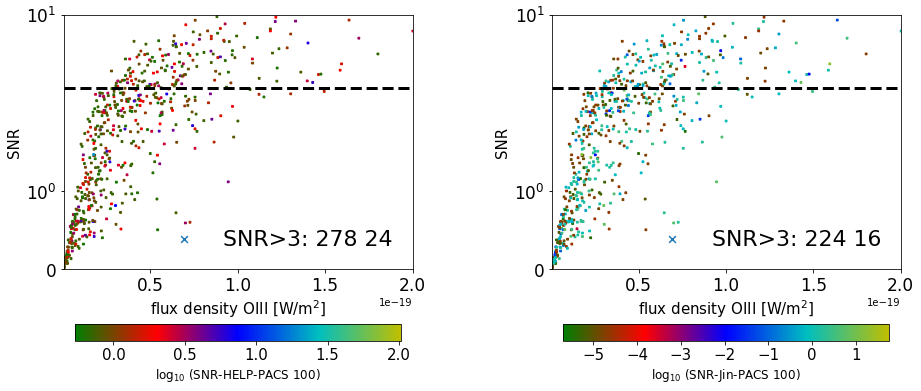

In [141]:
# Emission lines coloured by SNR PACS 100

cmap = colors.LinearSegmentedColormap.from_list('nameofcolormap',['g', 'r', 'b', 'c', 'y'],gamma=1.0)

# SNR in PACS 100 band for HELP and Jin data respectively
snr_1 = final_sample_HELP_Jin['herschel.pacs.100']/final_sample_HELP_Jin['herschel.pacs.100_err']    
snr_2 = final_sample_HELP_Jin['F100']/final_sample_HELP_Jin['DF100']  

help_snr_3 = snr_1[snr_1 > 3]
jin_snr_3  = snr_2[snr_2 > 3]

snr = [snr_1, snr_2, help_snr_3, jin_snr_3]
data_name = ['HELP', 'Jin']

# Halpha line plots
fig, axs = plt.subplots(1,2, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.18, wspace = 0.4)

for i in range(0,2):
    
    a = final_sample_HELP_Jin[(final_sample_HELP_Jin[lines[0]]/final_sample_HELP_Jin[lines[0]+'_err'] > 3)\
                              & (snr[i] > 3)]
    
    sc = axs[i].scatter(final_sample_HELP_Jin[lines[0]],\
                        final_sample_HELP_Jin[lines[0]]/final_sample_HELP_Jin[lines[0]+'_err'],\
                        s = 5, marker = 'x', c = np.log10(snr[i]),\
                        cmap = cmap, label = 'SNR>3: %i %i'%(len(snr[i+2]), len(a)))

    clb = plt.colorbar(sc, ax = axs[i], fraction = 0.05, pad = 0.17, orientation = 'horizontal')
    clb.set_label(label = r'$\log_{10}$ (SNR-'+str(data_name[i])+'-PACS 100)', size = 12)
    clb.ax.tick_params(labelsize = 15)

    axs[i].axhline(3.0, lw = 3, c = 'k', ls =  '--')
    axs[i].set_xlabel(r'flux density H$_\alpha$ [W/m$^2$]', fontsize = 15)
    axs[i].set_ylabel('SNR', fontsize = 15)
    axs[i].set_xlim(1e-22, 3e-19)
    axs[i].set_ylim(0, 20)
    axs[i].set_yscale('symlog')
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 17)
    axs[i].legend(frameon = False, prop = {'size': 22}, markerscale = 3, loc = 'lower right')

    
# Hbeta line plots    
fig, axs = plt.subplots(1,2, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.18, wspace = 0.4)

for i in range(0,2):
    
    a = final_sample_HELP_Jin[(final_sample_HELP_Jin[lines[1]]/final_sample_HELP_Jin[lines[1]+'_err'] > 3)\
                              & (snr[i] > 3)]
    
    sc = axs[i].scatter(final_sample_HELP_Jin[lines[1]],\
                     final_sample_HELP_Jin[lines[1]]/final_sample_HELP_Jin[lines[1]+'_err'],\
                     s = 5, marker = 'x', c = np.log10(snr[i]),\
                        cmap = cmap, label = 'SNR>3: %i %i'%(len(snr[i+2]), len(a)))

    clb = plt.colorbar(sc, ax = axs[i], fraction = 0.05, pad = 0.17, orientation = 'horizontal')
    clb.set_label(label = r'$\log_{10}$ (SNR-'+str(data_name[i])+'-PACS 100)', size = 12)
    clb.ax.tick_params(labelsize = 15)

    axs[i].axhline(3.0, lw = 3, c = 'k', ls =  '--')
    axs[i].set_xlabel(r'flux density H$_\beta$ [W/m$^2$]', fontsize = 15)
    axs[i].set_ylabel('SNR', fontsize = 15)
    axs[i].set_xlim(0.2e-22, 2e-19)
    axs[i].set_ylim(0, 10)
    axs[i].set_yscale('symlog')
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 17)
    axs[i].legend(frameon = False, prop = {'size': 22}, markerscale = 3, loc = 'lower right')
    
# OII line plots    
fig, axs = plt.subplots(1,2, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.18, wspace = 0.4)

for i in range(0,2):
    
    a = final_sample_HELP_Jin[(final_sample_HELP_Jin[lines[2]]/final_sample_HELP_Jin[lines[2]+'_err'] > 3)\
                              & (snr[i] > 3)]    
    
    sc = axs[i].scatter(final_sample_HELP_Jin[lines[2]],\
                     final_sample_HELP_Jin[lines[2]]/final_sample_HELP_Jin[lines[2]+'_err'],\
                     s = 5, marker = 'x', c = np.log10(snr[i]), cmap = cmap,\
                        label = 'SNR>3: %i %i'%(len(snr[i+2]), len(a)))

    clb = plt.colorbar(sc, ax = axs[i], fraction = 0.05, pad = 0.17, orientation = 'horizontal')
    clb.set_label(label = r'$\log_{10}$ (SNR-'+str(data_name[i])+'-PACS 100)', size = 12)
    clb.ax.tick_params(labelsize = 15)

    axs[i].axhline(3.0, lw = 3, c = 'k', ls =  '--')
    axs[i].set_xlabel(r'flux density OII [W/m$^2$]', fontsize = 15)
    axs[i].set_ylabel('SNR', fontsize = 15)
    axs[i].set_xlim(0.2e-22, 2e-19)
    axs[i].set_ylim(0, 10)
    axs[i].set_yscale('symlog')
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 17)  
    axs[i].legend(frameon = False, prop = {'size': 22}, markerscale = 3, loc = 'lower right')
    
# OIII line plots    
fig, axs = plt.subplots(1,2, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.18, wspace = 0.4)

for i in range(0,2):
    
    a = final_sample_HELP_Jin[(final_sample_HELP_Jin[lines[3]]/final_sample_HELP_Jin[lines[3]+'_err'] > 3)\
                              & (snr[i] > 3)]    
    
    sc = axs[i].scatter(final_sample_HELP_Jin[lines[3]],\
                     final_sample_HELP_Jin[lines[3]]/final_sample_HELP_Jin[lines[3]+'_err'],\
                     s = 5, marker = 'x', c = np.log10(snr[i]), cmap = cmap,\
                        label = 'SNR>3: %i %i'%(len(snr[i+2]), len(a)))

    clb = plt.colorbar(sc, ax = axs[i], fraction = 0.05, pad = 0.17, orientation = 'horizontal')
    clb.set_label(label = r'$\log_{10}$ (SNR-'+str(data_name[i])+'-PACS 100)', size = 12)
    clb.ax.tick_params(labelsize = 15)

    axs[i].axhline(3.0, lw = 3, c = 'k', ls =  '--')
    axs[i].set_xlabel(r'flux density OIII [W/m$^2$]', fontsize = 15)
    axs[i].set_ylabel('SNR', fontsize = 15)
    axs[i].set_xlim(5e-22, 2e-19)
    axs[i].set_ylim(0, 10)
    axs[i].set_yscale('symlog')
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 17)  
    axs[i].legend(frameon = False, prop = {'size': 22}, markerscale = 3, loc = 'lower right')

# Safe sample with two PACS and SNR > 3

In [58]:
# At least two PACS with SNR > 3
# Checking the number of objects per band, per emission lines and a combiantion of both\

best_sample = PACS_data[(PACS_data['herschel.pacs.100']/PACS_data['herschel.pacs.100_err'] > 3)\
                        & (PACS_data['herschel.pacs.160']/PACS_data['herschel.pacs.160_err'] > 3)]

print('--------------------------------------------------------------------------------------------------------')
print('  Bands\t\t\tNumber of Objects\tPercentage (%)\t\tSNR > 3\t\tPercentage (%)')
print('--------------------------------------------------------------------------------------------------------')

for i in range (len(columns_final)):\
    
    data = best_sample[columns_final[i]][best_sample[columns_final[i]] > 0]
    snr  = best_sample[best_sample[columns_final[i]]/best_sample[columns_final[i]+'_err'] > 3]
    
    print('%10s\t\t\t%i\t\t%.2f\t\t\t%i\t\t%.2f'%(column_names[i], len(data), len(data)/len(best_sample)*100,\
                                            len(snr), len(snr)/len(best_sample)*100))
    
print('--------------------------------------------------------------------------------------------------------')

--------------------------------------------------------------------------------------------------------
  Bands			Number of Objects	Percentage (%)		SNR > 3		Percentage (%)
--------------------------------------------------------------------------------------------------------
       NUV			71		59.17			37		30.83
         u			120		100.00			102		85.00
         B			120		100.00			111		92.50
         V			120		100.00			113		94.17
         r			119		99.17			116		96.67
         i			120		100.00			117		97.50
         z			120		100.00			115		95.83
         y			119		99.17			104		86.67
         J			120		100.00			118		98.33
         H			120		100.00			117		97.50
        Ks			119		99.17			119		99.17
    Irac 1			120		100.00			120		100.00
    Irac 2			120		100.00			120		100.00
    Irac 3			99		82.50			70		58.33
     Irac4			77		64.17			43		35.83
Spitzer 24			120		100.00			98		81.67
  PACS 100			120		100.00			120		100.00
  PACS 160			120		100.00			120		100.00
 SPIRE 250			67		55.83			54		45.00
 SPIRE 350		

In [60]:
best_sample.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                        'CIGALE_file/COSMOS_final_BestSample.fits', format='fits')